# Predicting Customer Churn (Bank)

#### Author: Rainier Goubault 
#### Title: Head of Marketing and Data Analytics @ job well done 
#### Email: rainy@jobwelldoneagency.com 
#### LinkedIn: https://www.linkedin.com/in/rainiergoubault/

# Objective:

    1. Identify and visualize which factors contribute to customer churn.
    
    2. Build a re-usable machine learning pipeline prediction model that will classify if a customer is going to 
    churn or not, thus making it easier for the company to target these 'high-risk' customers (i.e. those that 
    might churn) as apart of its customer retention strategy/efforts.


# Introduction:

## What is churn?
Churn is defined as when customers discontinue doing business with a company.

## Why is churn important?
Most companies have a large number of customers and can't afford to devote much time and resources for individual customer retention. However, if a company could forecast which customers are most likely to leave ahead of time, it could focus its customer rentention efforts on these 'high-risk' churn customers.

As a result, by addressing customer churn, these companies may not only preserve their market position, but also grow and thrive. A company key focus for success is reducing client attrition and implementing an effective retention strategy.


## Dataset:

The dataset used can be found at: https://www.kaggle.com/santoshd3/bank-customers

# 1. Gather the data

### 1.1 Load the libraries

In [1]:
# Warning
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np 
import pandas as pd

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import mannwhitneyu

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualiation options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style('white')

# Set notebook options
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 100) # display 100 rows

### 1.2 Check Version History

In [2]:
%load_ext watermark
print('Package Versions:\n')
%watermark -iv

Package Versions:

pandas    : 1.3.3
scipy     : 1.7.1
seaborn   : 0.11.2
matplotlib: 3.4.3
numpy     : 1.21.2
json      : 2.0.9



### 1.3 Import the dataset

In [3]:
bank_customer = pd.read_csv('bank_customer.csv')
df = bank_customer.copy()
print('The dataset has been sucessfully loaded!')

The dataset has been sucessfully loaded!


# 2. Exploratory Data Analysis

### 2.1 Basics

In [4]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


    - The dataset contains 10,000 entries (i.e rows) and 14 features (i.e. columns)
    - Each row represents a single customer of the bank.
    - Each column represents an attribute, in this case, customer info collected by the bank.
    - The dataset doesn't have any missing values.
    - The dataset contains mixed data types, most (11) are numerical while the remainder (3) are catergorical.

### 2.2 Missing Values

In [7]:
missing = df.isna()
missing.any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

    - As we saw above, the dataset has no missing values.

### 2.3 Dupluicate Values

In [8]:
duplicates = df.duplicated()
duplicates.any()

False

    - The dataset has no duplicate values.

### 2.4 Constant Values

In [9]:
constants = df.nunique()
constants = [i for i, v in enumerate(constants) if v == 1]
constants

[]

    - The dataset has no constant values.

### 2.5 Unique Values

In [10]:
uniques = df.nunique()
uniques

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

    - All rows for 'RowNumber' and 'CustomerID' feature have unique values. 
    - These values are irrelevant and will drop from the dataset. 
    - We will also drop the 'Surname' feature to keep the data anonomous.

In [11]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [12]:
df.shape

(10000, 11)

    - After dropping irrelevant features, the total number of features is now 11, down from the 14 we had initially when the dataset was imported.

In [13]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [14]:
df.describe(include='all').T

count unique     top  freq           mean           std  \
CreditScore      10000.0    NaN     NaN   NaN       650.5288     96.653299   
Geography          10000      3  France  5014            NaN           NaN   
Gender             10000      2    Male  5457            NaN           NaN   
Age              10000.0    NaN     NaN   NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN   NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN   NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN   NaN         1.5302      0.581654   
HasCrCard        10000.0    NaN     NaN   NaN         0.7055       0.45584   
IsActiveMember   10000.0    NaN     NaN   NaN         0.5151      0.499797   
EstimatedSalary  10000.0    NaN     NaN   NaN  100090.239881  57510.492818   
Exited           10000.0    NaN     NaN   NaN         0.2037      0.402769   

                   min       25%         50%          75%        max  
CreditScore      350.0     584.0       652.0        718.0      850.0  
Geography          NaN       NaN         NaN          NaN        NaN  
Gender             NaN       NaN         NaN          NaN        NaN  
Age               18.0      32.0        37.0         44.0       92.0  
Tenure             0.0       3.0         5.0          7.0       10.0  
Balance            0.0       0.0    97198.54    127644.24  250898.09  
NumOfProducts      1.0       1.0         1.0          2.0        4.0  
HasCrCard          0.0       0.0         1.0          1.0        1.0  
IsActiveMember     0.0       0.0         1.0          1.0        1.0  
EstimatedSalary  11.58  51002.11  100193.915  149388.2475  199992.48  
Exited             0.0       0.0         0.0          0.0        1.0

## Target Feature

In [15]:
target = df['Exited']

In [16]:
target.describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

In [17]:
target_count = target.value_counts()
target_count

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
sum_retained = target_count[0]
sum_churned = target_count[1]
print('Number of retained customers:', sum_retained)
print('Number of churned customers:', sum_churned)

Number of retained customers: 7963
Number of churned customers: 2037


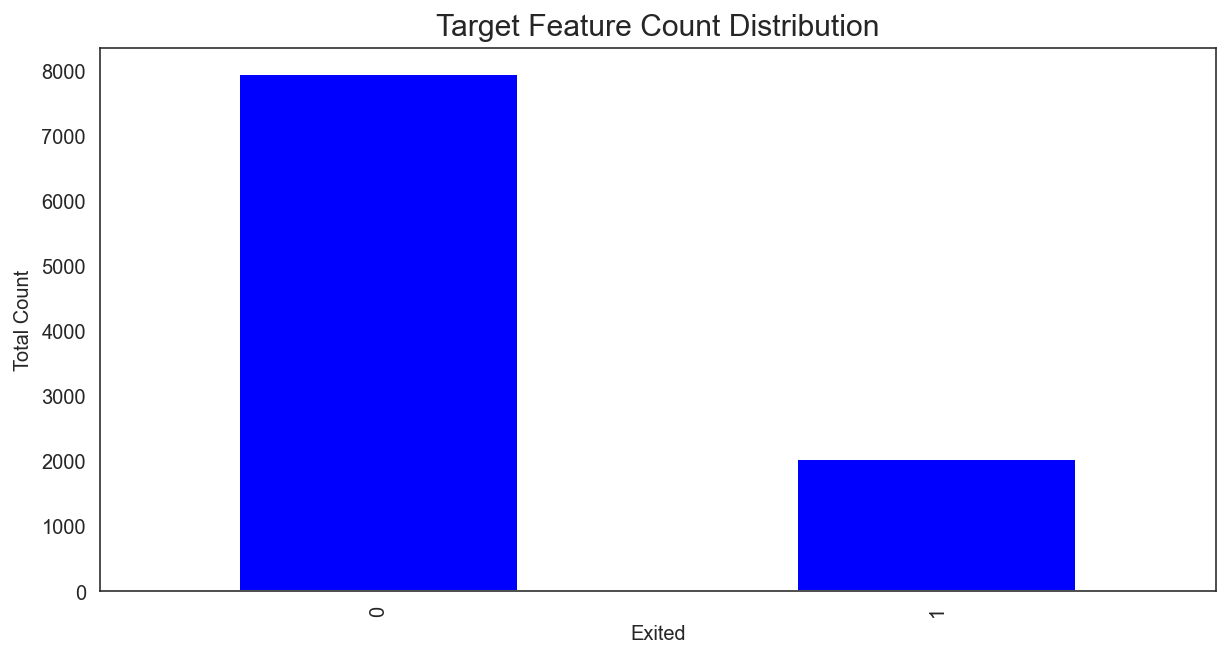

In [19]:
plt.figure(figsize=(10, 5))
target_count.plot.bar(color='blue')
plt.title('Target Feature Count Distribution', size=15)
plt.xlabel('Exited')
plt.ylabel('Total Count');

In [20]:
target_percent= target.value_counts(normalize=True) * 100
target_percent

0    79.63
1    20.37
Name: Exited, dtype: float64

In [21]:
percent_retained = target_percent[0]
percent_churned = target_percent[1]
print(f'Percentage of retained customers: {round(percent_retained, 2)}%')
print(f'Percentage of churned customers: {round(percent_churned, 2)}%')

Percentage of retained customers: 79.63%
Percentage of churned customers: 20.37%


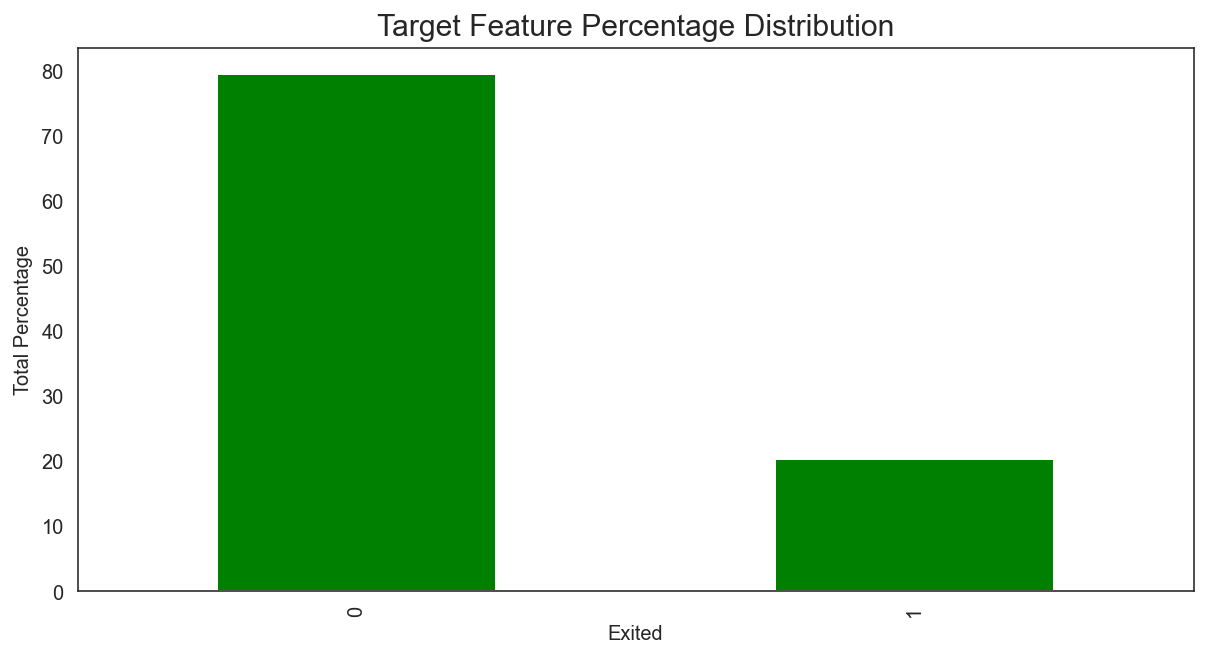

In [22]:
plt.figure(figsize=(10, 5))
target_percent.plot.bar(color='green')
plt.title('Target Feature Percentage Distribution', size=15)
plt.xlabel('Exited')
plt.ylabel('Total Percentage');

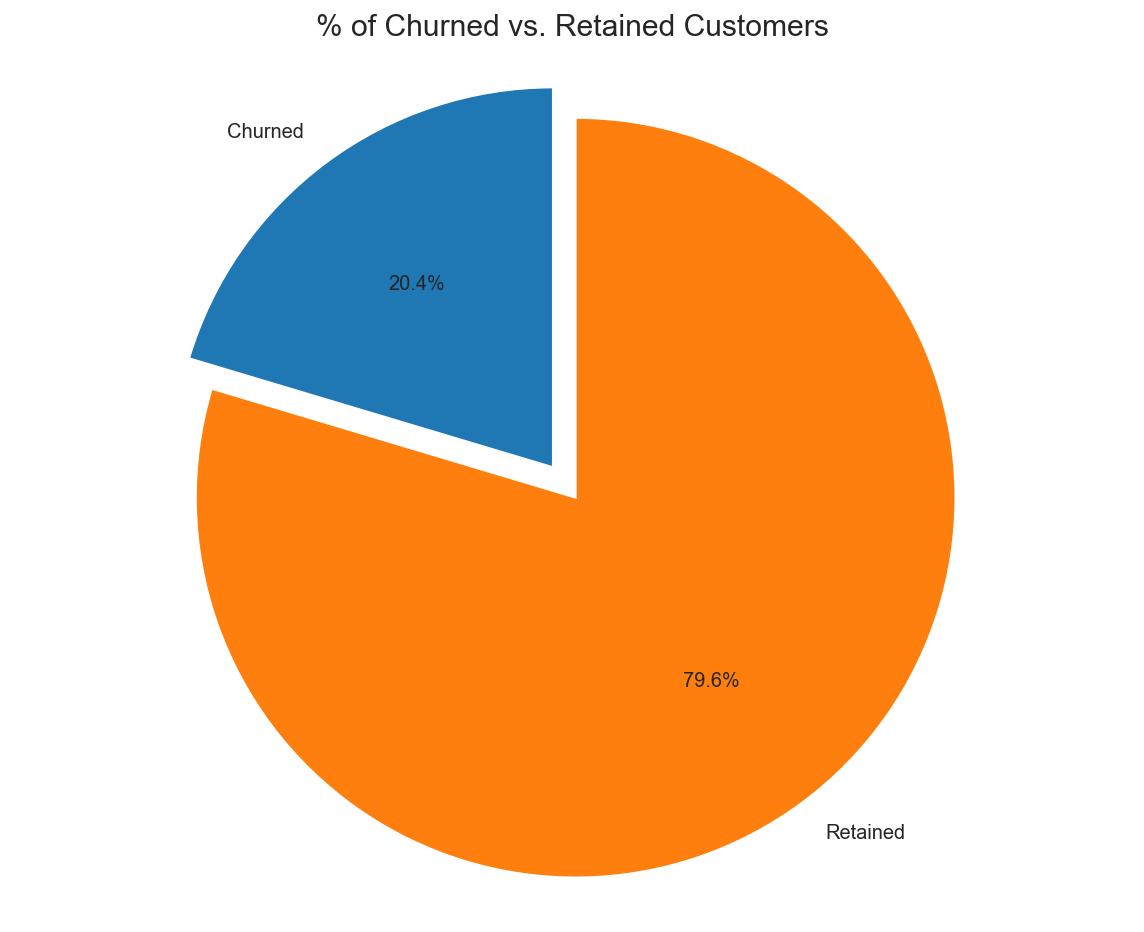

In [23]:
labels = 'Churned', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title('% of Churned vs. Retained Customers', size=15)
plt.show()

Conclusions:

    - The target feature 'Exited' is already numerical, with '0' denoting those customers who did not exit from the bank (i.e. retained) and '1' denoting those customers who exited from the bank (i.e. churned).
    - 20.4% (2,037) of customers churned while 79.6% (7,963) of customers were retained.
    - The target feature is imbalanced.

## Numerical Features

In [24]:
num_feats = df.select_dtypes(include='number').columns

In [25]:
print('The # of numerical features are:', len(num_feats))

The # of numerical features are: 9


In [26]:
print('The numerical features are:\n', num_feats)

The numerical features are:
 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [27]:
df[num_feats].head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0

### Statistical Summary

In [28]:
df[num_feats].describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

### Numerical Features Distributions

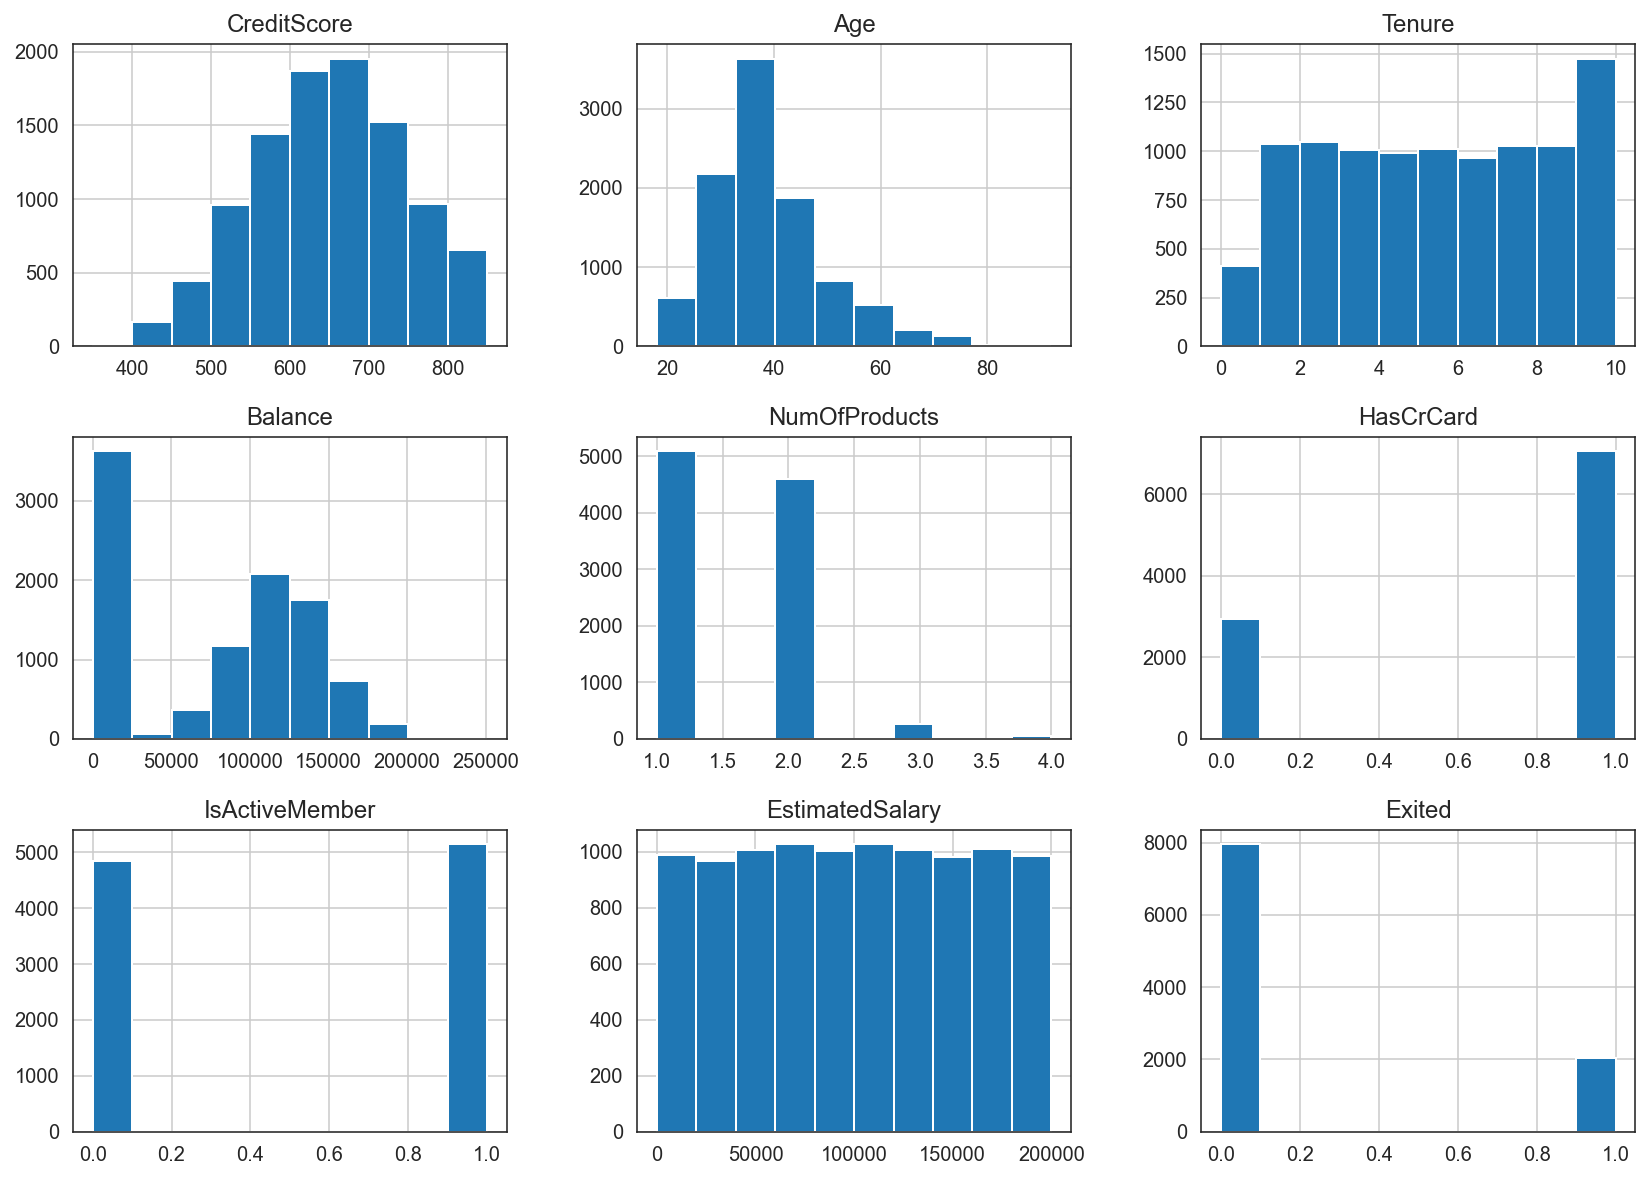

In [29]:
df[num_feats].hist(figsize=(14,10));

In [30]:
df[num_feats].skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [31]:
df[num_feats].kurt()

CreditScore       -0.425726
Age                1.395347
Tenure            -1.165225
Balance           -1.489412
NumOfProducts      0.582981
HasCrCard         -1.186973
IsActiveMember    -1.996747
EstimatedSalary   -1.181518
Exited             0.165671
dtype: float64

### Numerical Features Distribution vs. Target Variable

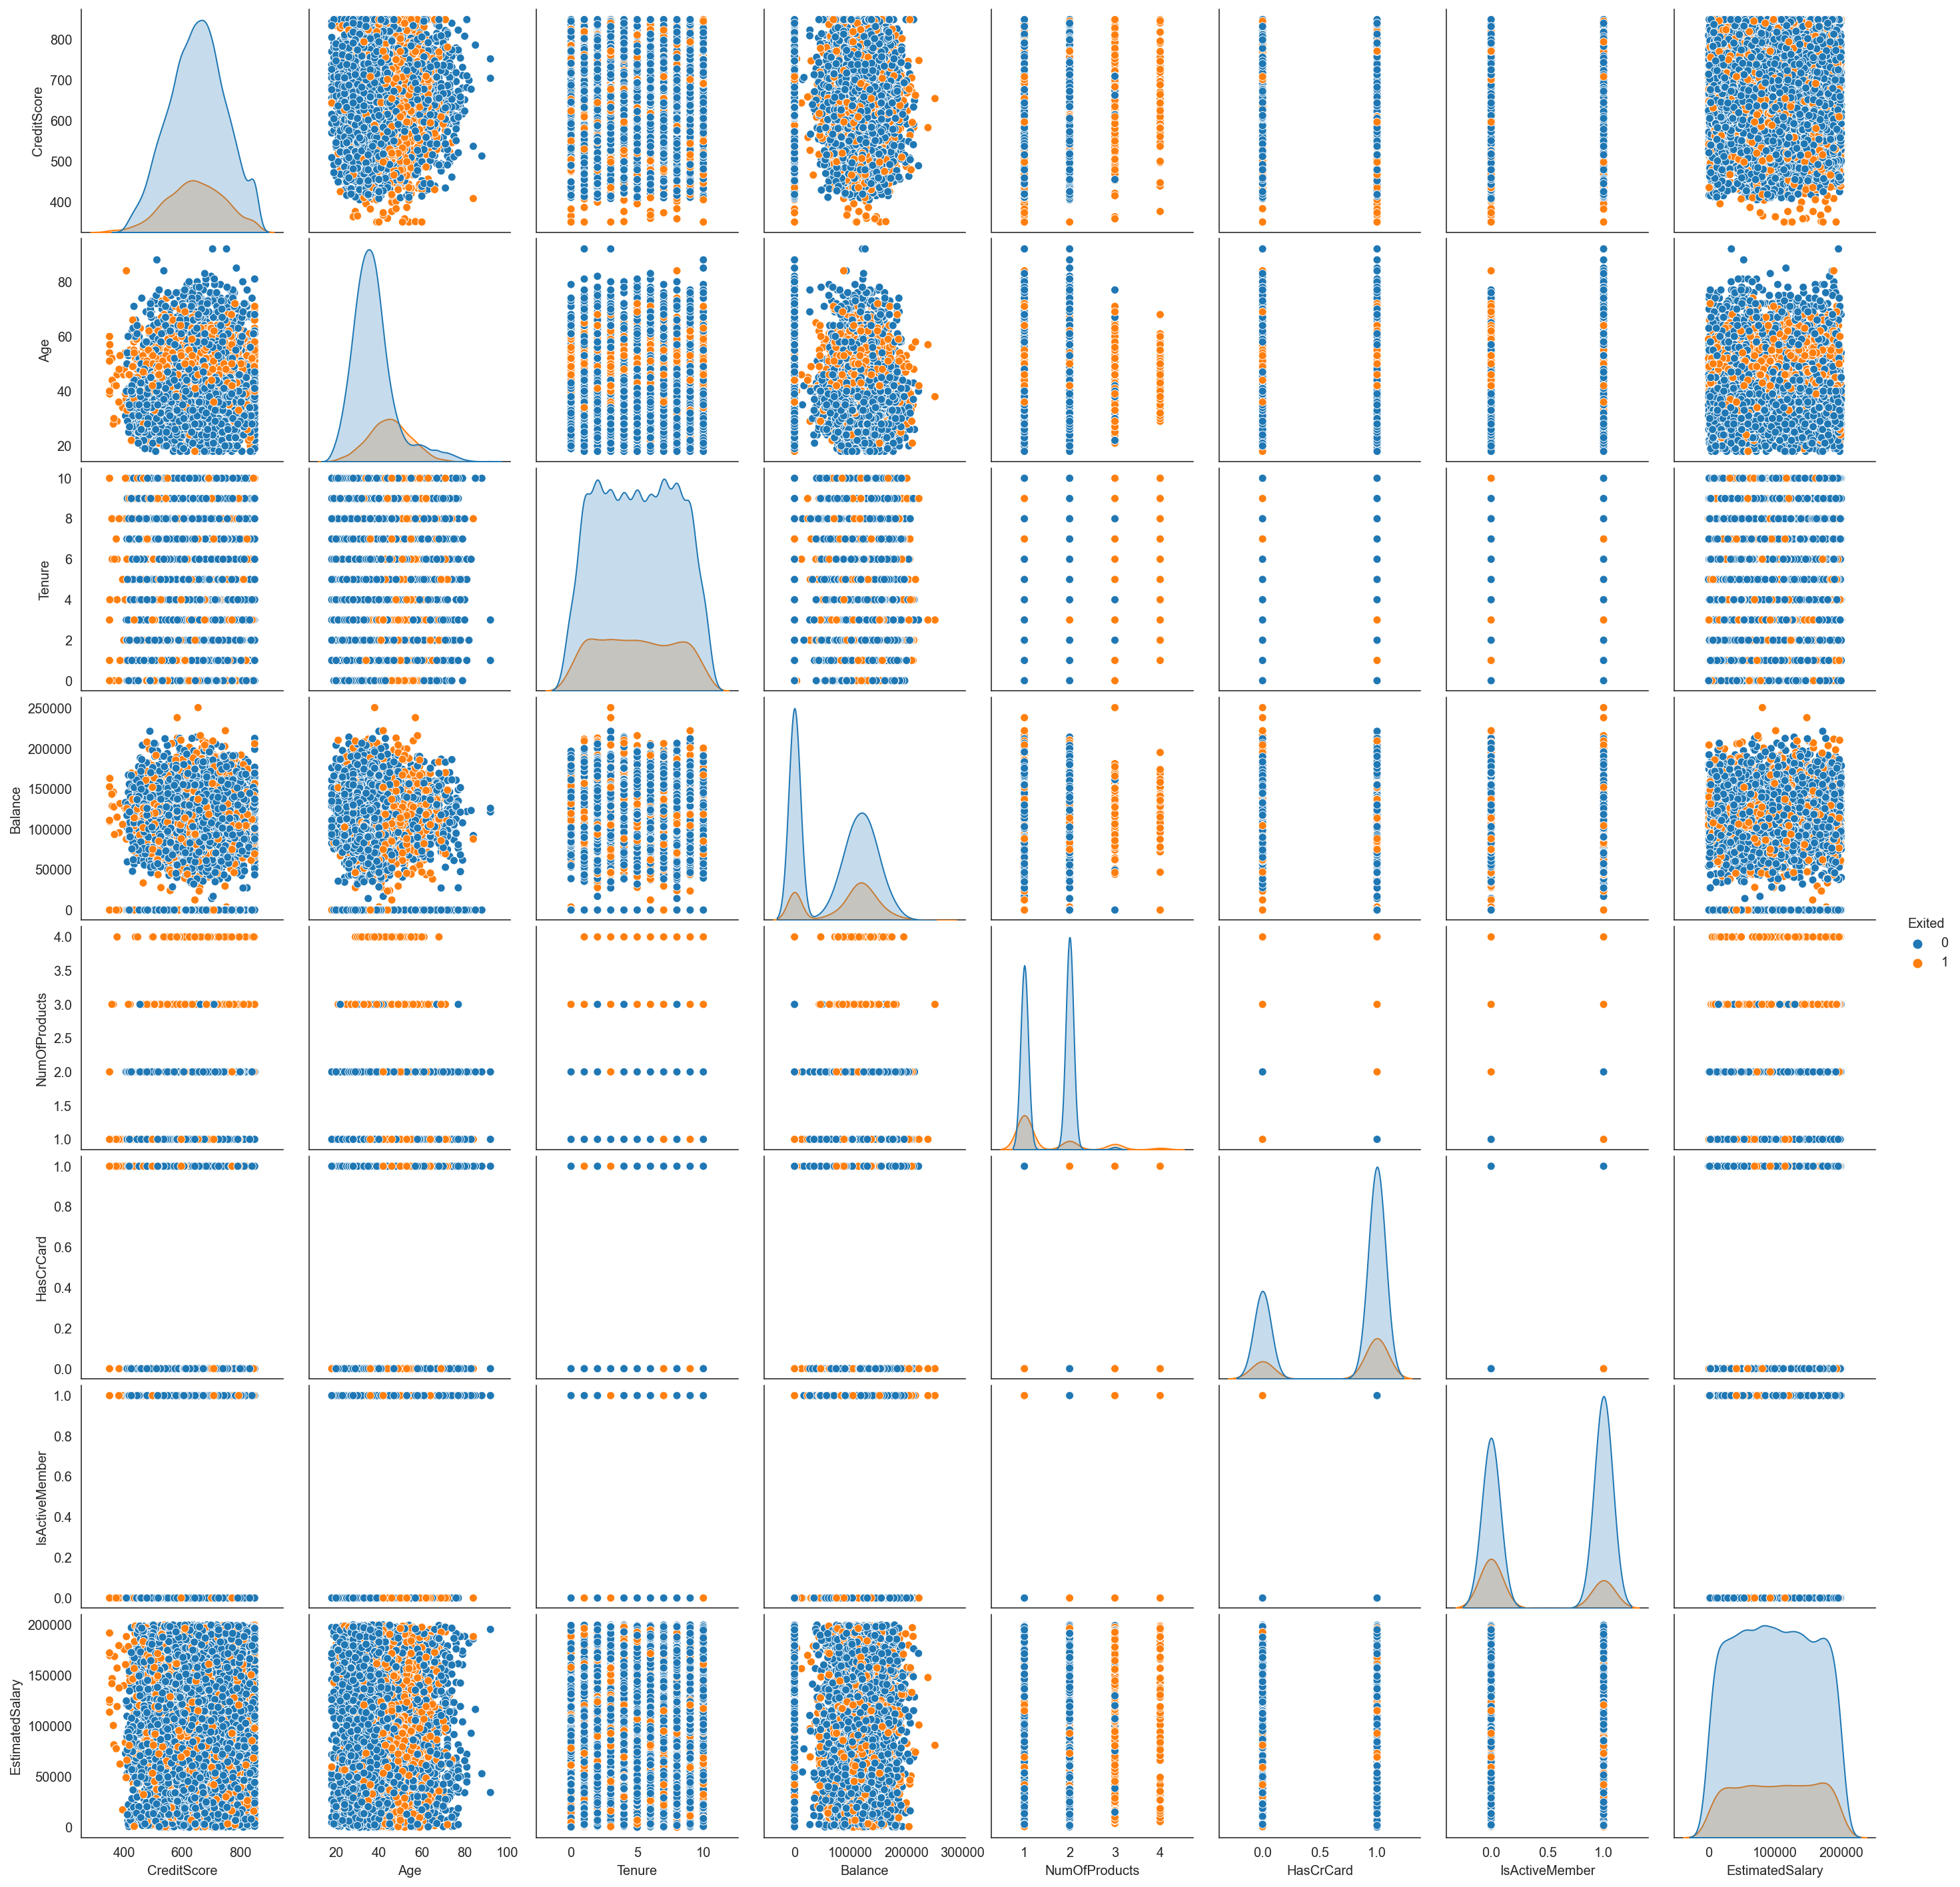

In [32]:
sns.pairplot(data=df[num_feats], hue='Exited');

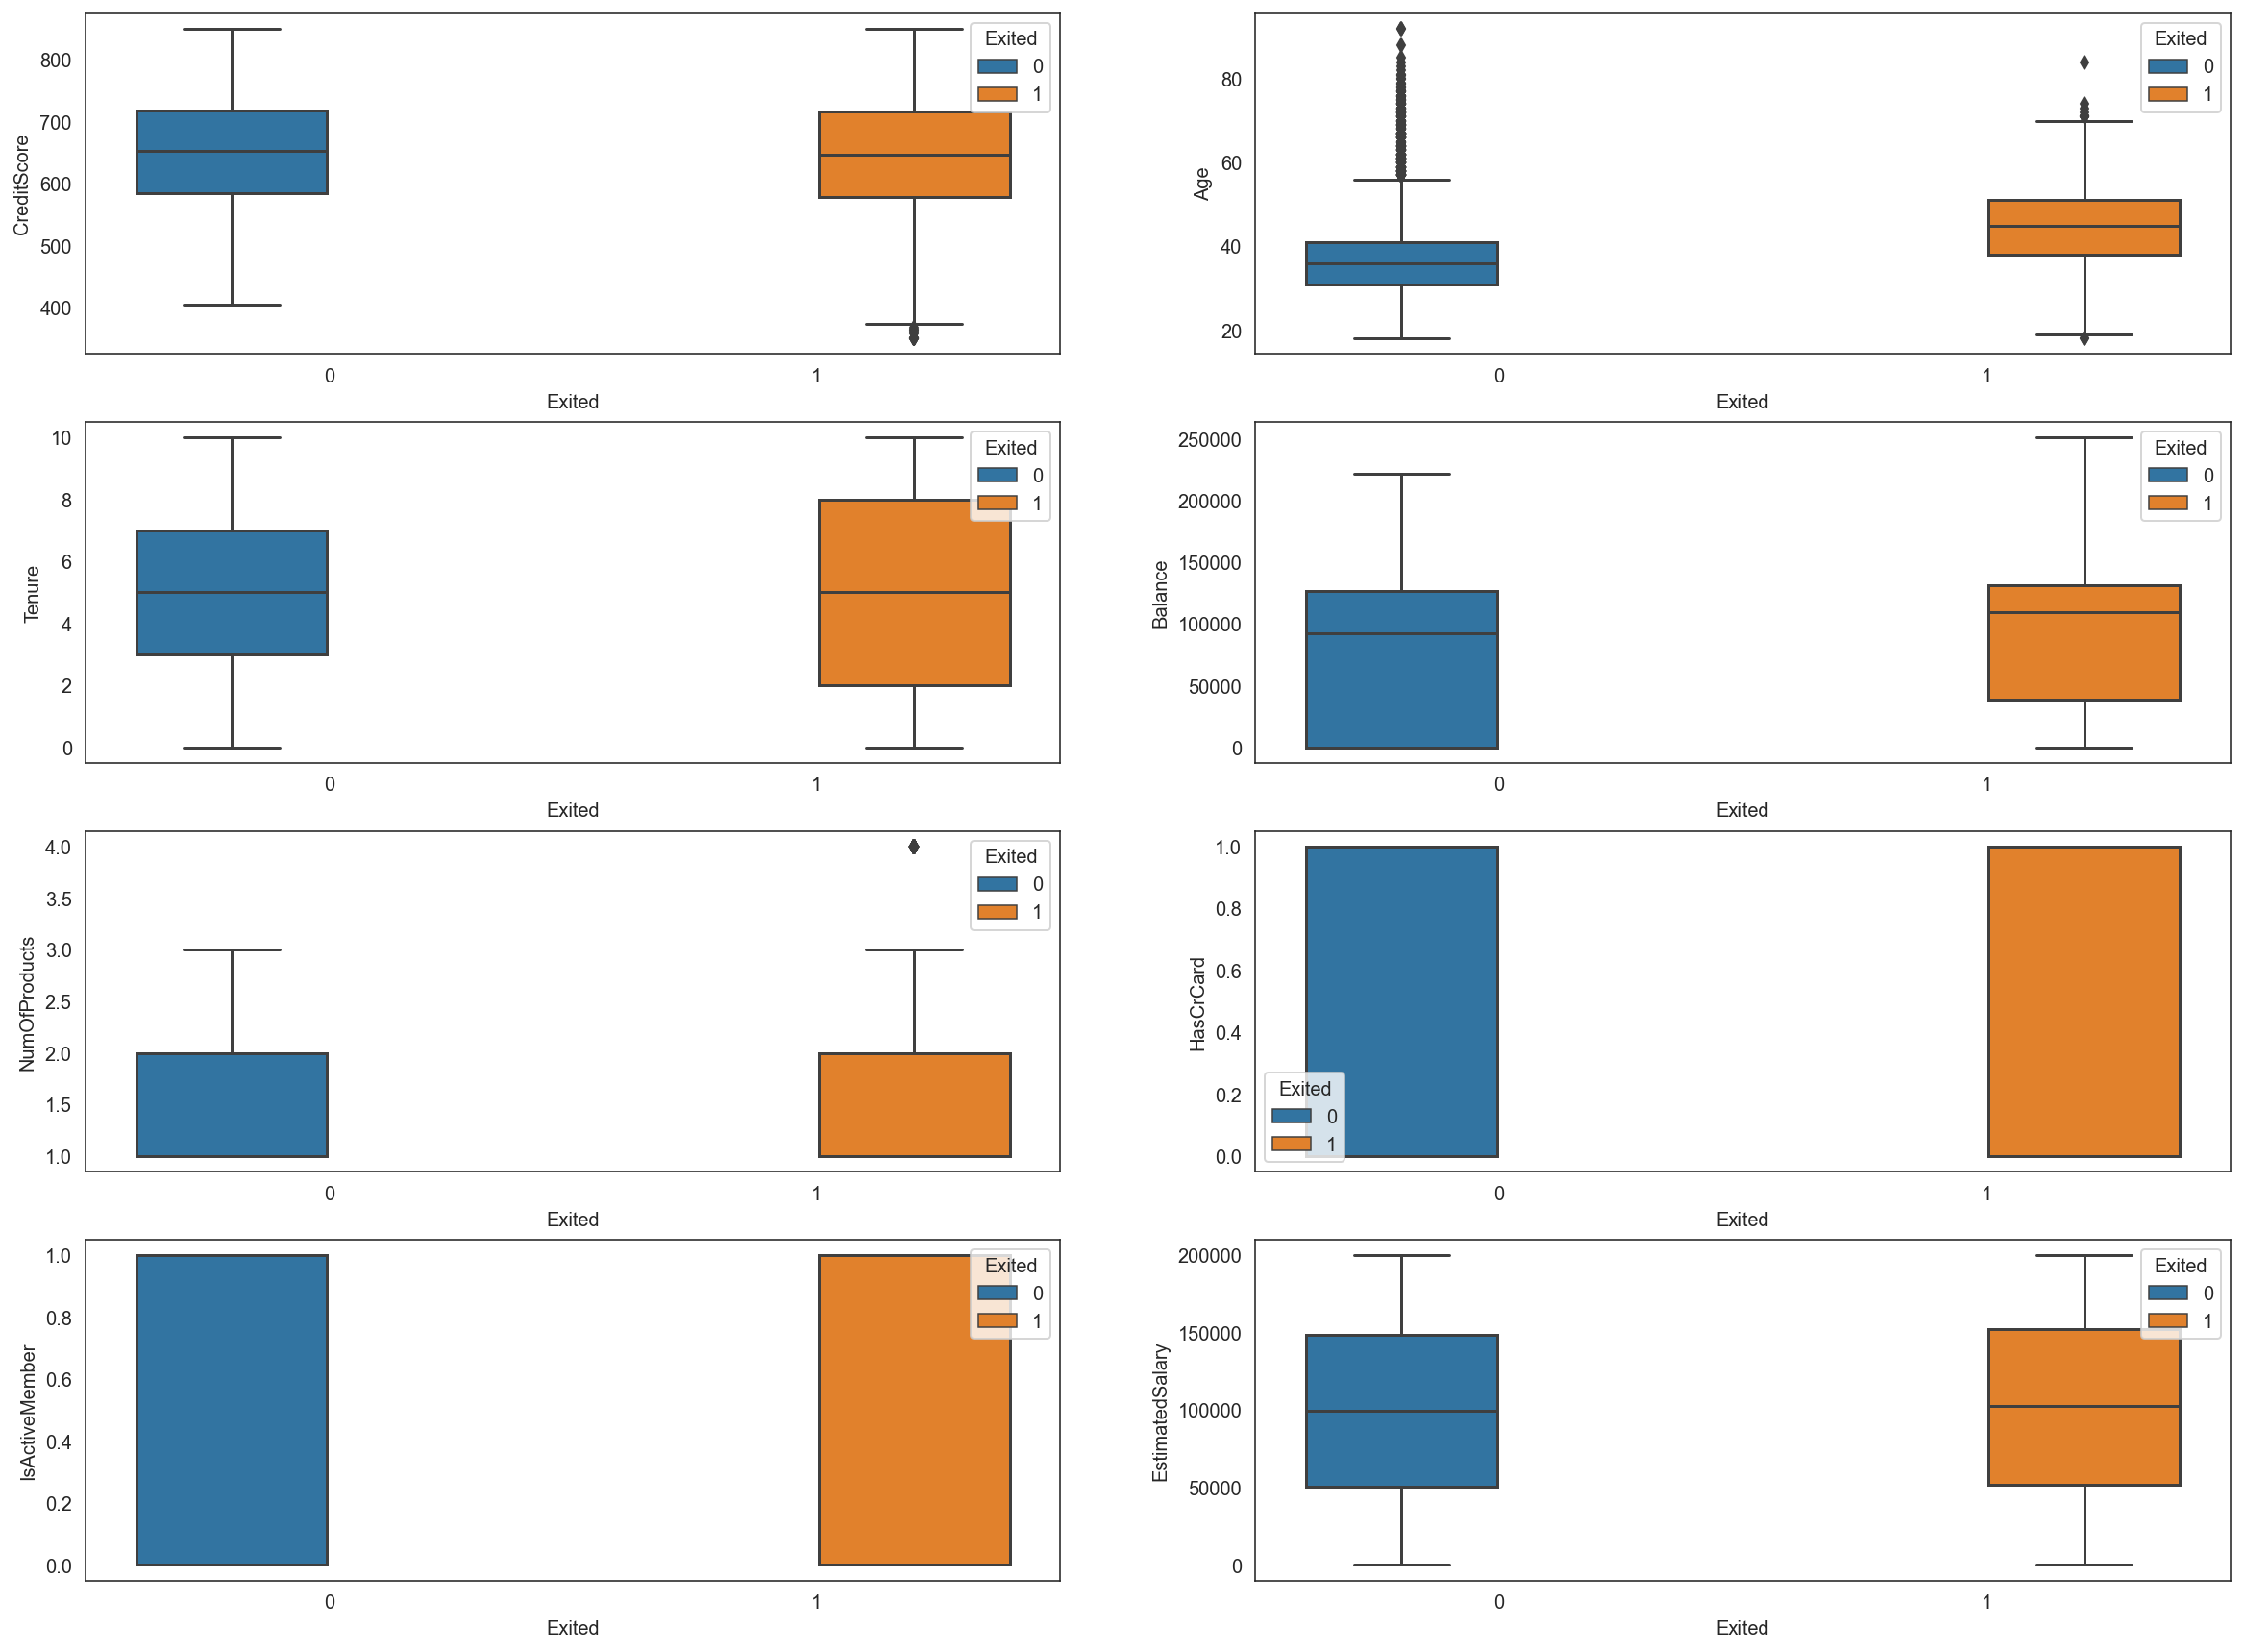

In [33]:
fig, axarr = plt.subplots(4, 2, figsize=(20, 15))
sns.boxplot(data=df[num_feats], x='Exited', y='CreditScore', hue='Exited', ax=axarr[0][0])
sns.boxplot(data=df[num_feats], x='Exited', y='Age', hue='Exited', ax=axarr[0][1])
sns.boxplot(data=df[num_feats], x='Exited', y='Tenure', hue='Exited', ax=axarr[1][0])
sns.boxplot(data=df[num_feats], x='Exited', y='Balance', hue='Exited', ax=axarr[1][1])
sns.boxplot(data=df[num_feats], x='Exited', y='NumOfProducts', hue='Exited', ax=axarr[2][0])
sns.boxplot(data=df[num_feats], x='Exited', y='HasCrCard', hue='Exited', ax=axarr[2][1])
sns.boxplot(data=df[num_feats], x='Exited', y='IsActiveMember', hue='Exited', ax=axarr[3][0])
sns.boxplot(data=df[num_feats], x='Exited', y='EstimatedSalary', hue='Exited', ax=axarr[3][1]);

    - 'CreditScore': Customers' credit score doesn't seem to affect churn.
    - 'Age': Older customers are more likely to churn than younger customers.
    - 'Tenure': Customers who spent little time with the bank and customers who have been with the bank the longest          are more likely to churn than those with an average tenure.
    - 'Balance': Customers with higher balances are more likely to churn.
    - 'NumOfProducts': The number of products a customer has with the bank doesn't seem to influence churn.
    - 'EstimatedSalary': Customers salary does not seem to affect churn.

    Note:
    - From the above, it appears that two numerical features ('HasCrCard') and ('IsActiveMemeber') are in fact               binary categorical features. We'll look at theses more in-depth when we visualize categorical features.

### Numerical Features Relationship

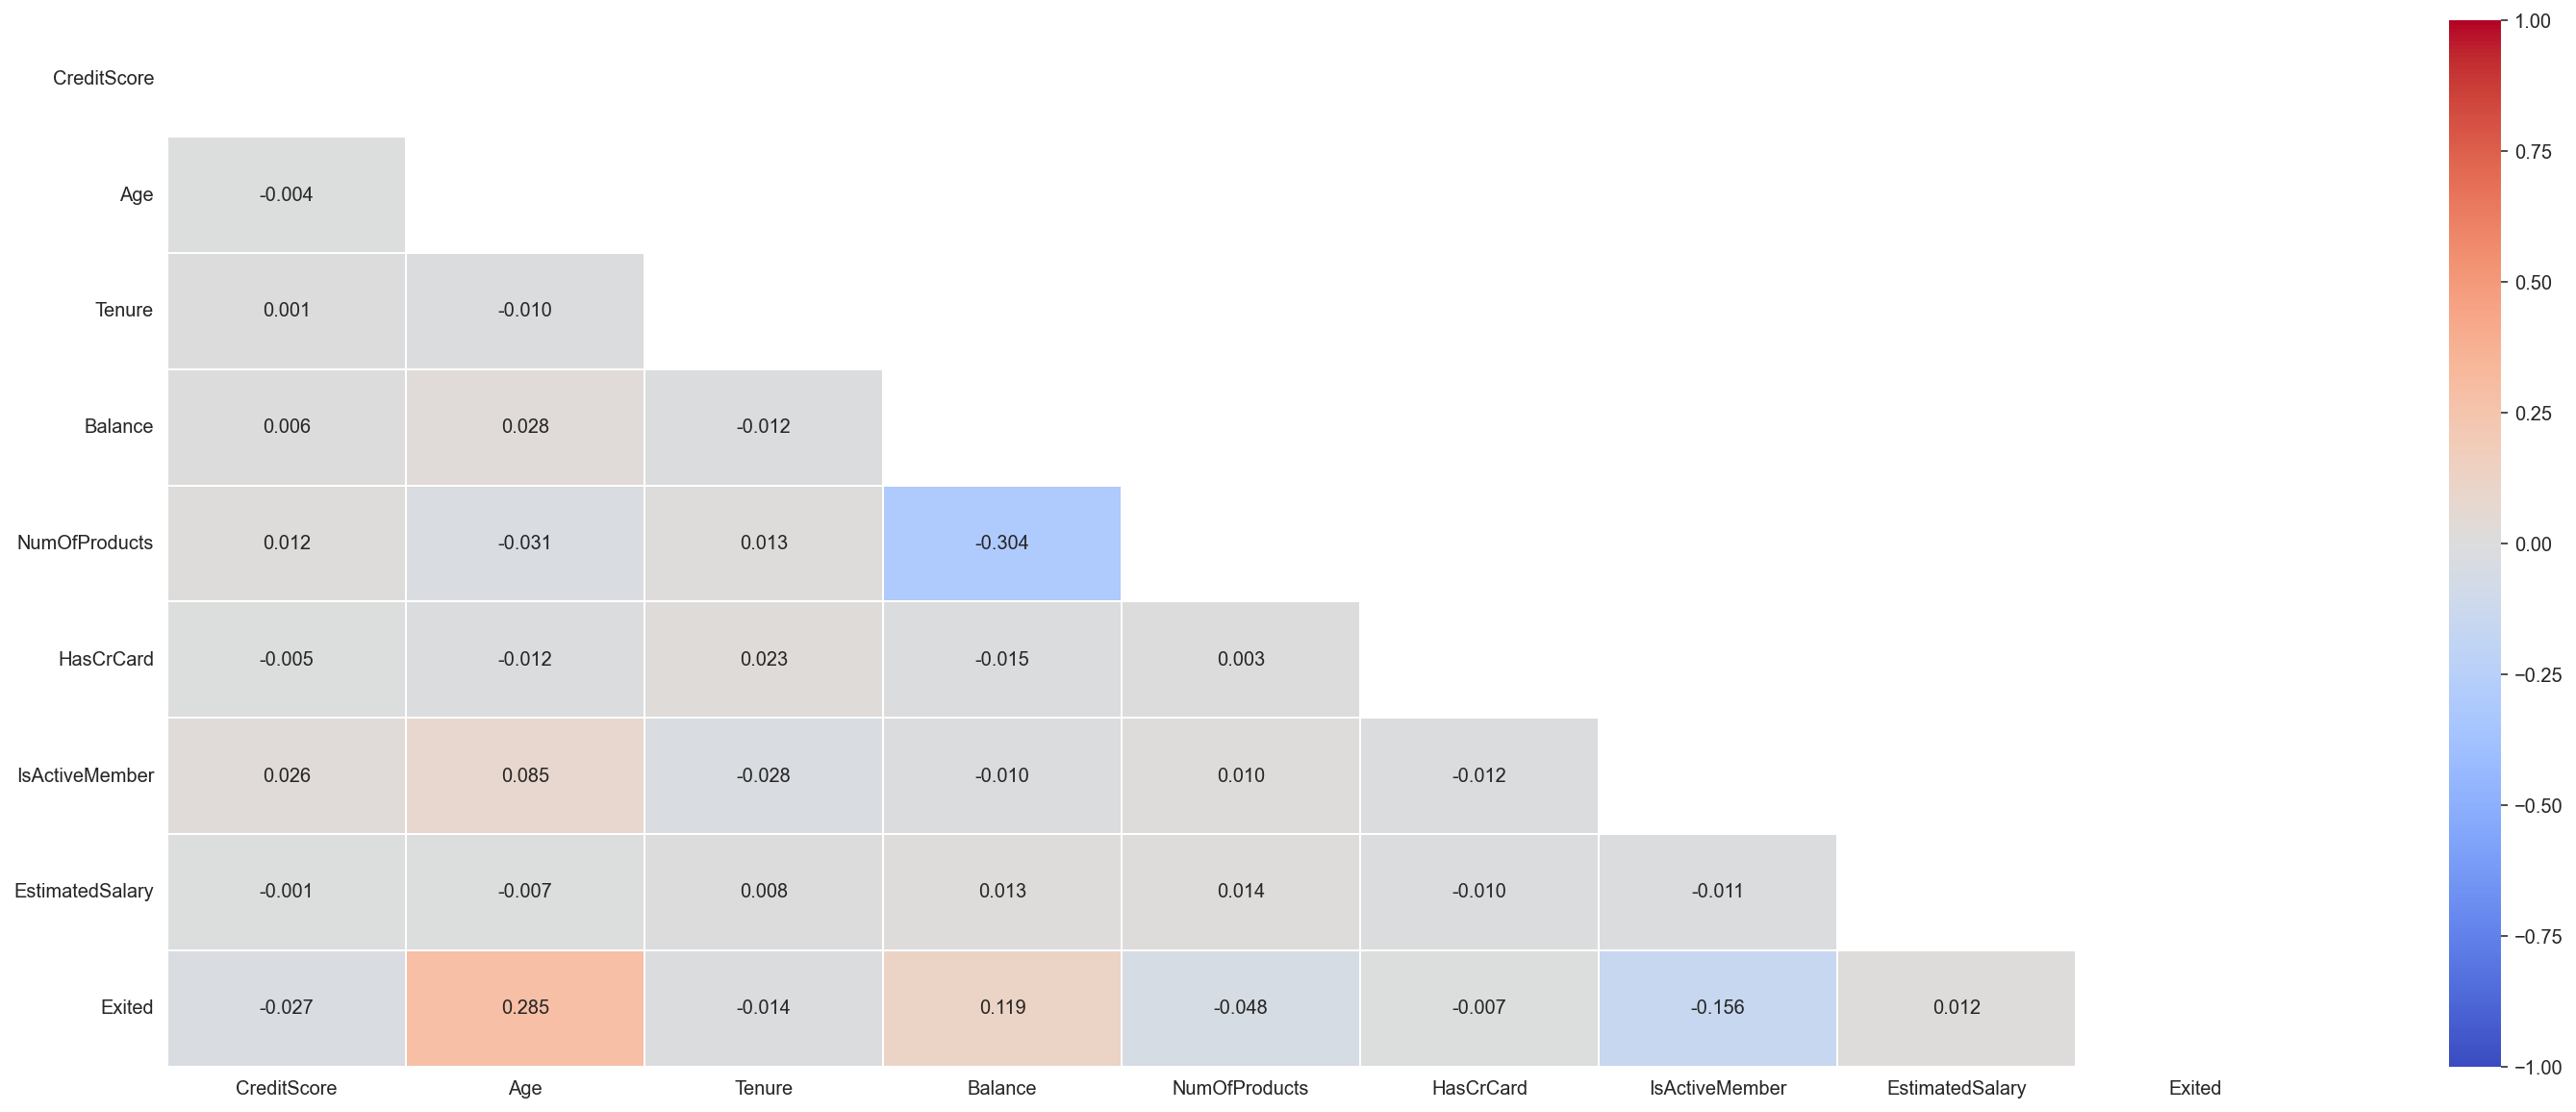

In [34]:
plt.figure(figsize=(25, 10))

corr_matrix = df[num_feats].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix, 
                 mask=mask, 
                 xticklabels=corr_matrix.columns, 
                 yticklabels=corr_matrix.columns, 
                 annot=True,
                 fmt='.3f',
                 linewidths=.2, 
                 cmap='coolwarm', 
                 vmin=-1, vmax=1);

## Categorical Features

In [35]:
cat_feats = df.select_dtypes(include='object').columns

In [36]:
print('The # of categorical features are:', len(cat_feats))

The # of categorical features are: 2


In [37]:
print('The categorical features are:\n', cat_feats)

The categorical features are:
 Index(['Geography', 'Gender'], dtype='object')


In [38]:
df[cat_feats].head()

Geography  Gender
0    France  Female
1     Spain  Female
2    France  Female
3    France  Female
4     Spain  Female

    - We have two categorical variables: 'Geography' and 'Gender'

In [39]:
df[cat_feats].describe()

Geography Gender
count      10000  10000
unique         3      2
top       France   Male
freq        5014   5457

    - 'Geography': consists of 3 unique values, the top value is France with 5014 total entries.
    - 'Gender': consists of 2 unique values, the top value is Male with 5457 total entires.

### Categorical Feature Distributions

### 'Geography' Feature

In [40]:
geo_sum = df['Geography'].value_counts()
geo_sum

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

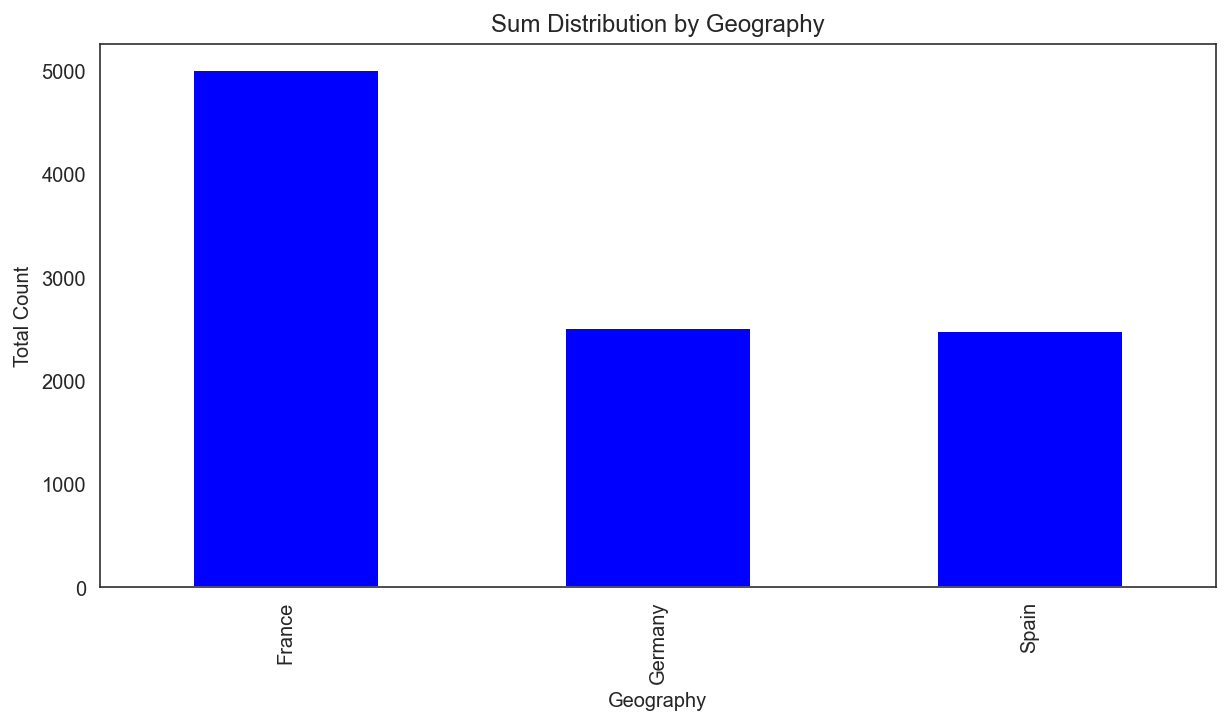

In [41]:
plt.figure(figsize=(10, 5))
geo_sum.plot.bar(color='blue')
plt.title('Sum Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Total Count');

In [42]:
geo_percent = df['Geography'].value_counts(normalize=True) * 100
geo_percent

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

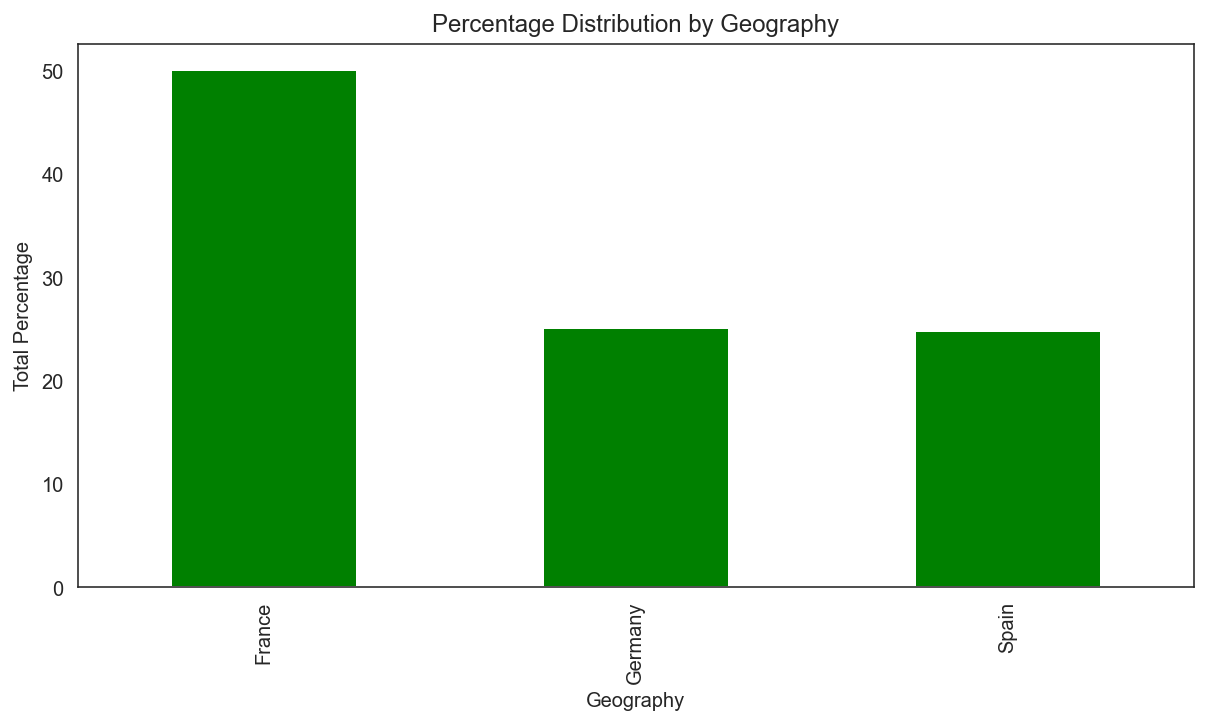

In [43]:
plt.figure(figsize=(10, 5))
geo_percent.plot.bar(color='green')
plt.title('Percentage Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Total Percentage');

    - Half, 50.14% (5014 in total) of customers are from France, with an almost even split 25.09% (2509) from 
      Germany, and 24.77% (2477) from Spain.


### vs. Target Variable

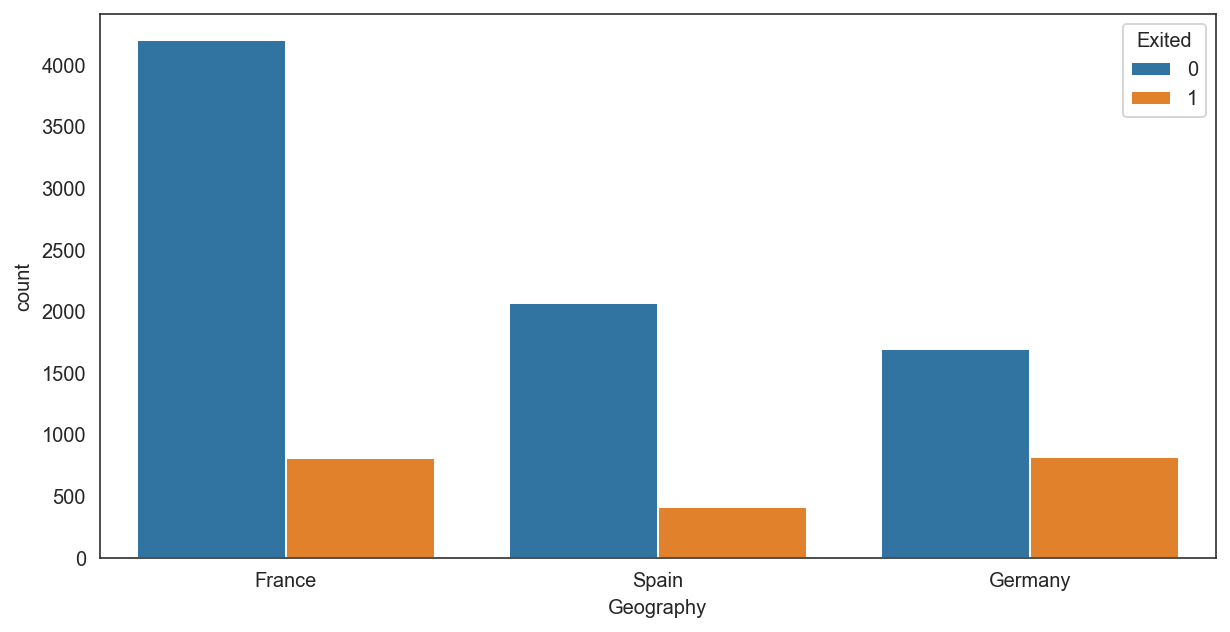

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x=df['Geography'], hue=df['Exited']);

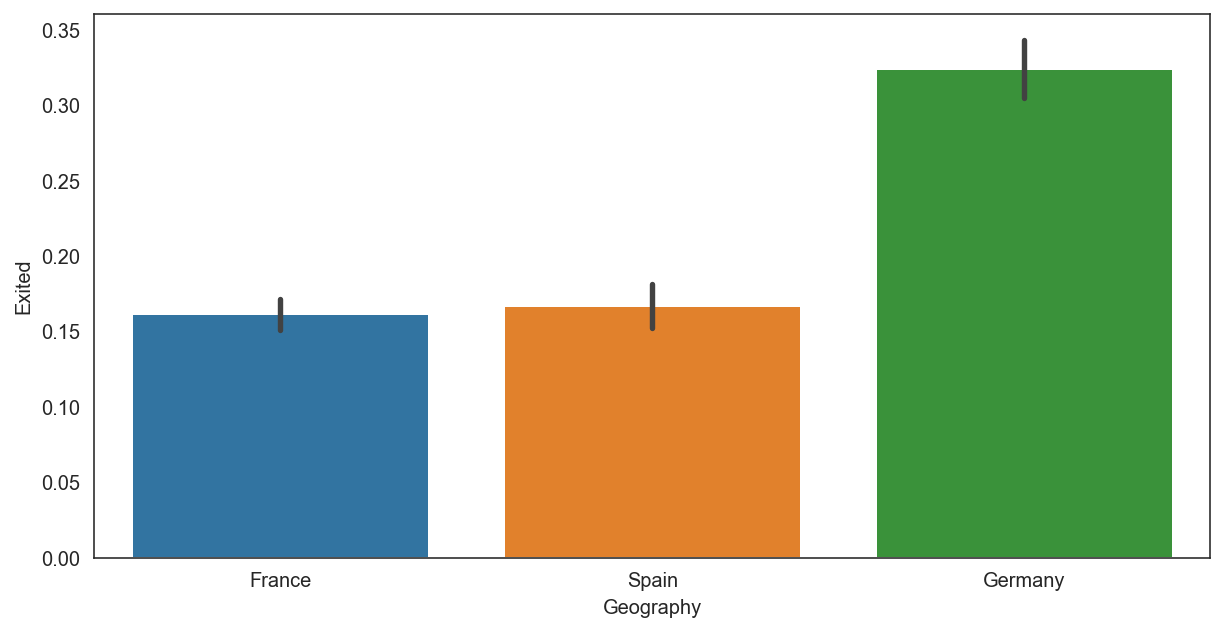

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x=df['Geography'], y=df['Exited']);

    - German customers with a churn rate of (~ 33%), churn the most. 
    - The churn rate (~ 16%) is similair between French and Spanish customers.

### 'Gender' Feature

In [46]:
gender_sum = df['Gender'].value_counts()
gender_sum

Male      5457
Female    4543
Name: Gender, dtype: int64

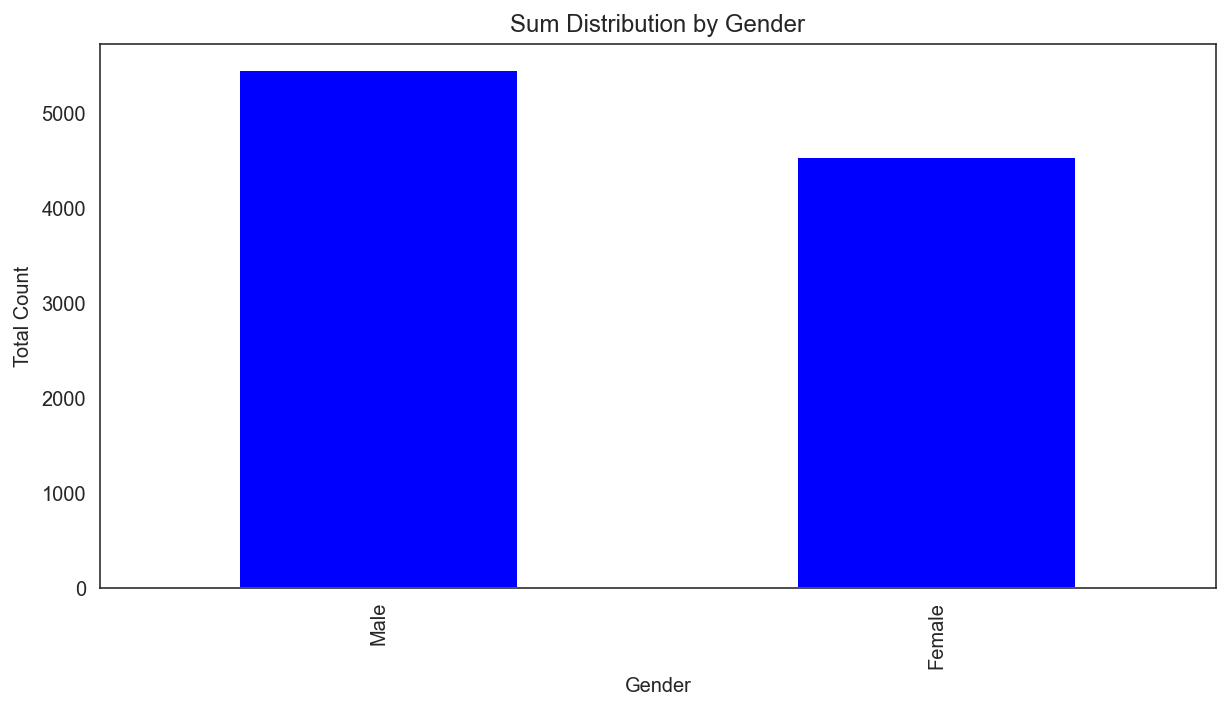

In [47]:
plt.figure(figsize=(10, 5))
gender_sum.plot.bar(color='blue')
plt.title('Sum Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Count');

In [48]:
gender_percent = df['Gender'].value_counts(normalize=True) * 100
gender_percent

Male      54.57
Female    45.43
Name: Gender, dtype: float64

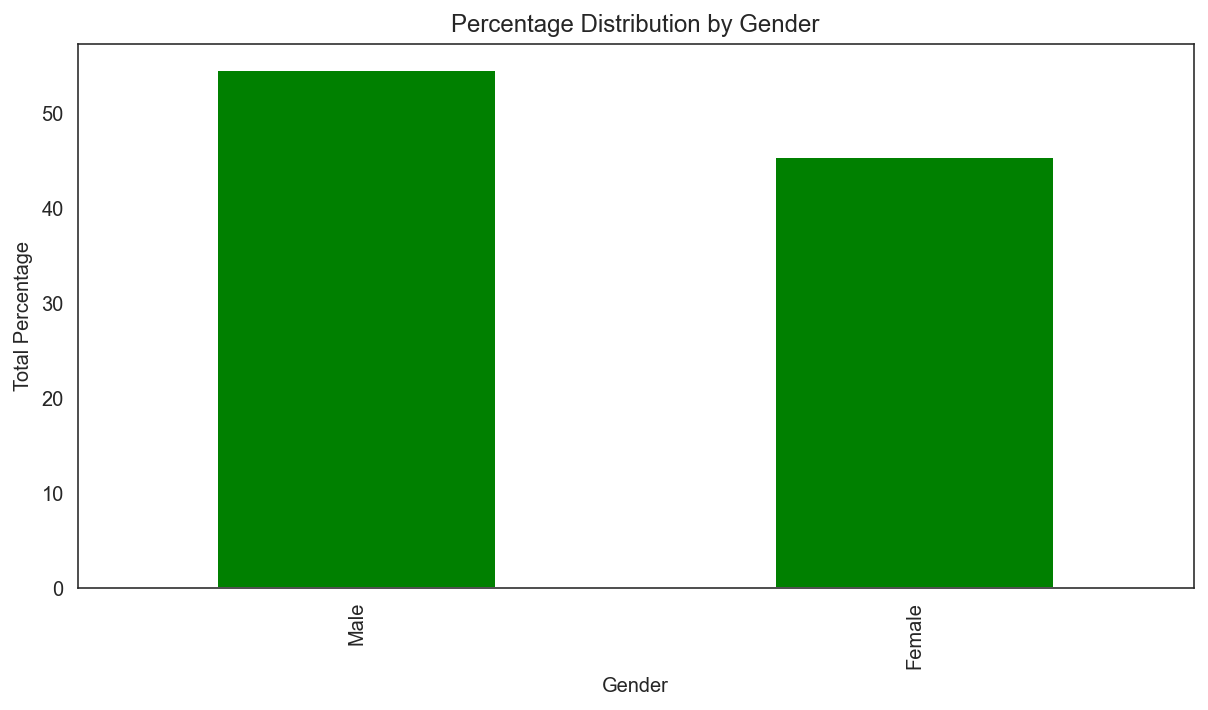

In [49]:
plt.figure(figsize=(10, 5))
gender_percent.plot.bar(color='green')
plt.title('Percentage Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Percentage');

    - There are more male customers then female customer.
    - 54.57% (5457 in total) of customers are male, while 45.43% (4543) are female.

### vs. Target Variable

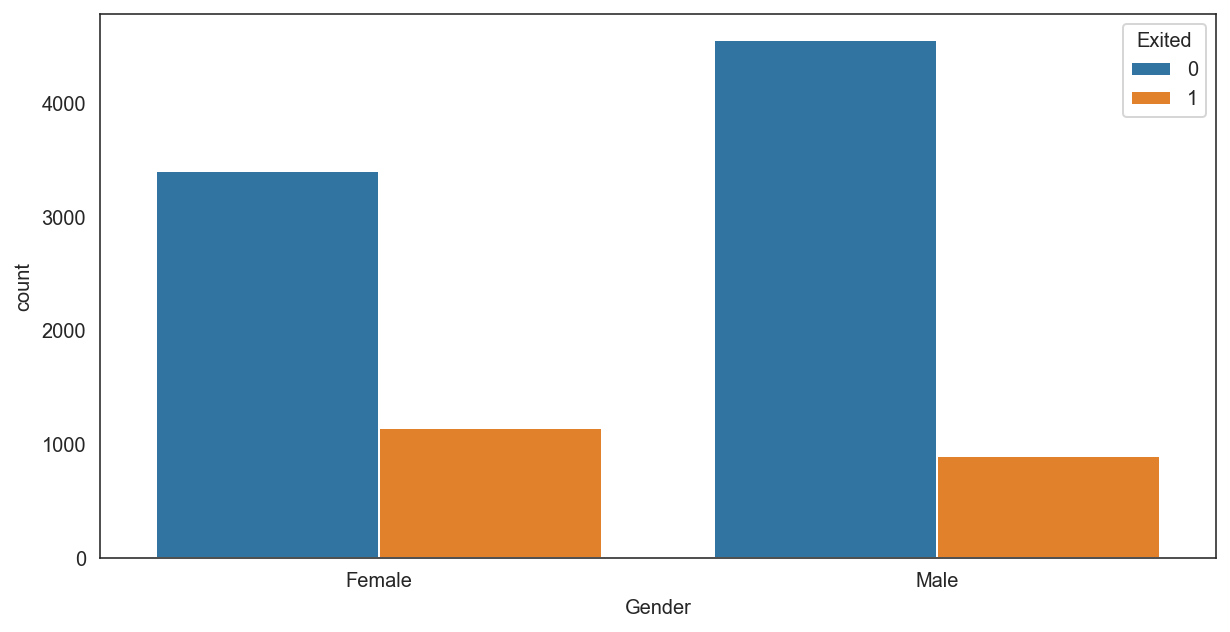

In [50]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x=df['Gender'], hue=df['Exited']);

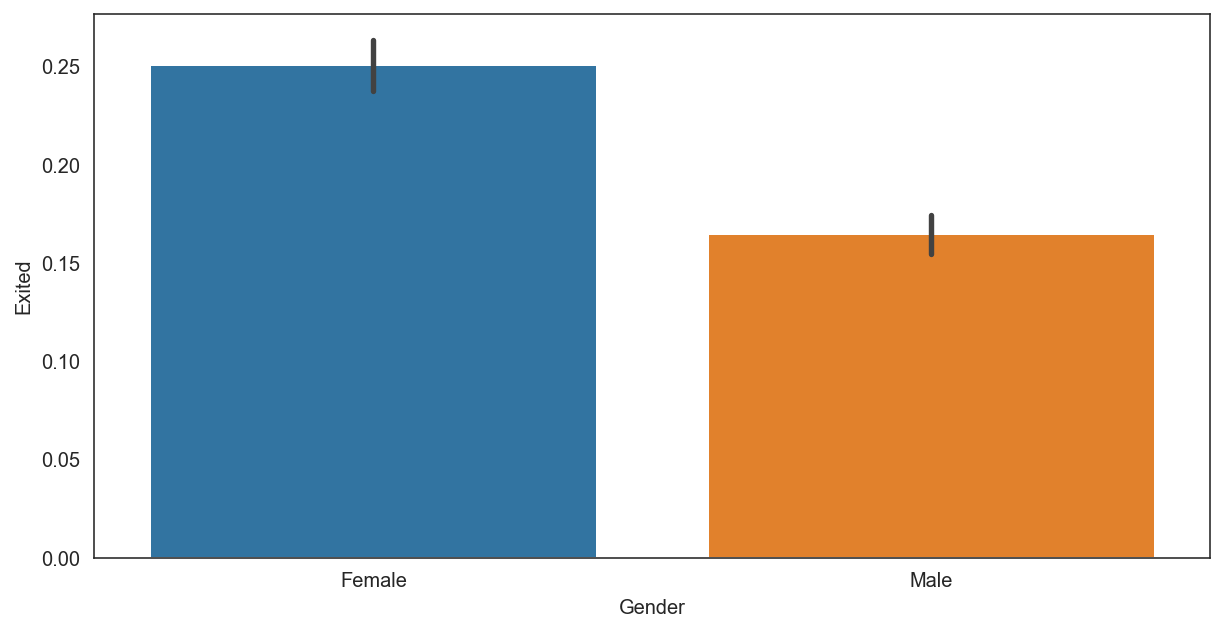

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x=df['Gender'], y=df['Exited']);

    - Female customers have a higher churn rate than male customers (~ 25% vs. ~17%)

### 'HasCrCard' Feature

In [52]:
card_sum = df['HasCrCard'].value_counts()
card_sum

1    7055
0    2945
Name: HasCrCard, dtype: int64

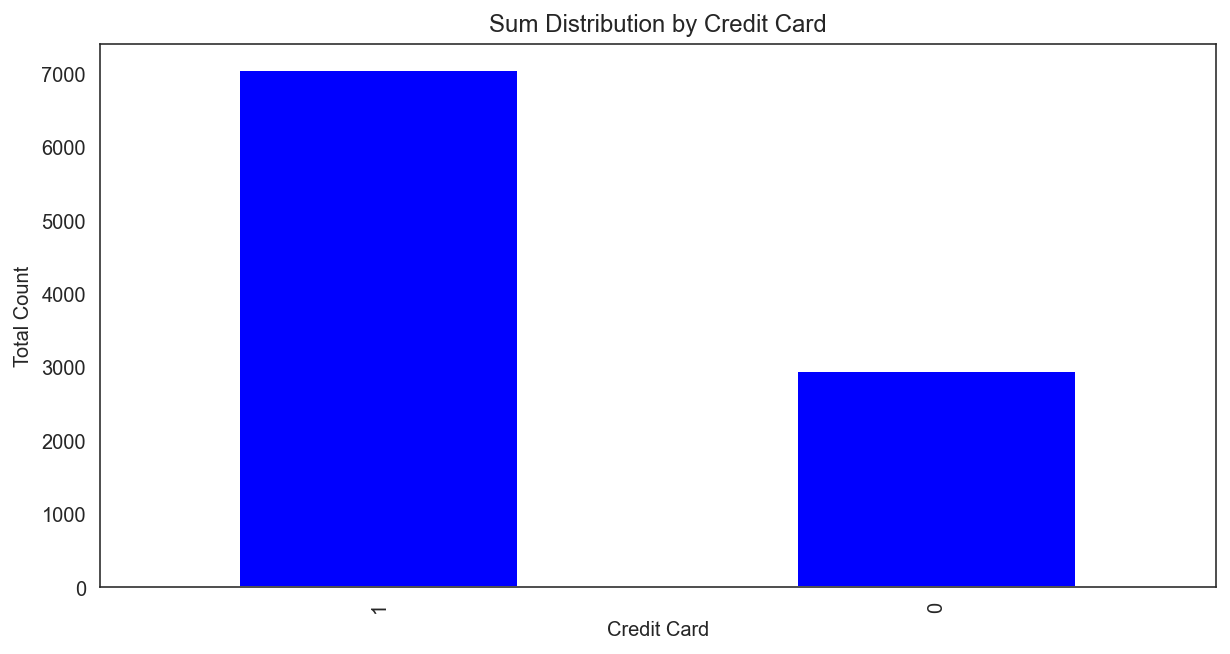

In [53]:
plt.figure(figsize=(10, 5))
card_sum.plot.bar(color='blue')
plt.title('Sum Distribution by Credit Card')
plt.xlabel('Credit Card')
plt.ylabel('Total Count');

In [54]:
card_percent = df['HasCrCard'].value_counts(normalize=True) * 100
card_percent

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

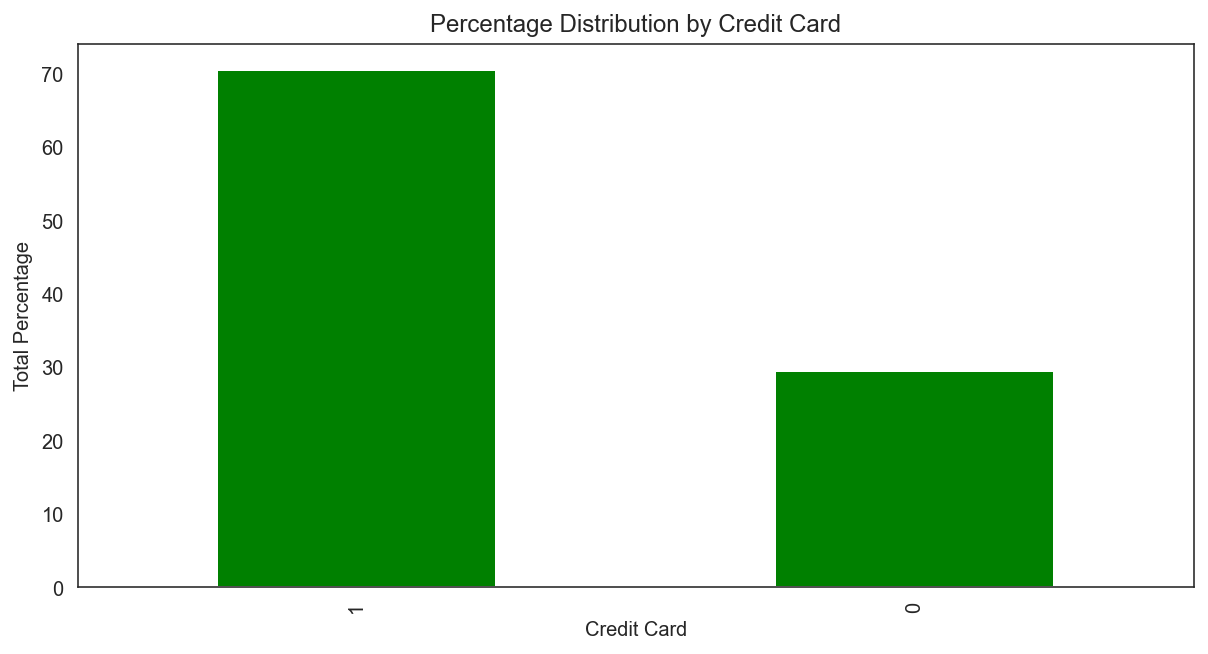

In [55]:
plt.figure(figsize=(10, 5))
card_percent.plot.bar(color='green')
plt.title('Percentage Distribution by Credit Card')
plt.xlabel('Credit Card')
plt.ylabel('Total Percentage');

    -  70.55% (7055) of customers have a credit card with the bank, while 29.45% (2945) do not.

### vs. Target Variable

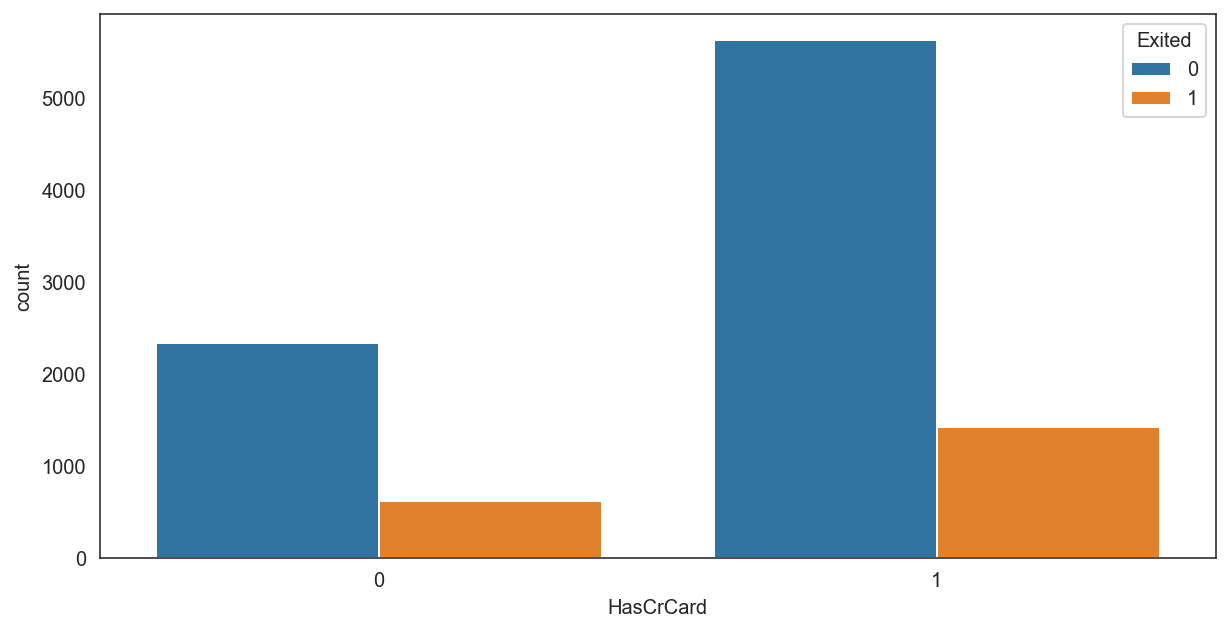

In [56]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x=df['HasCrCard'], hue=df['Exited']);

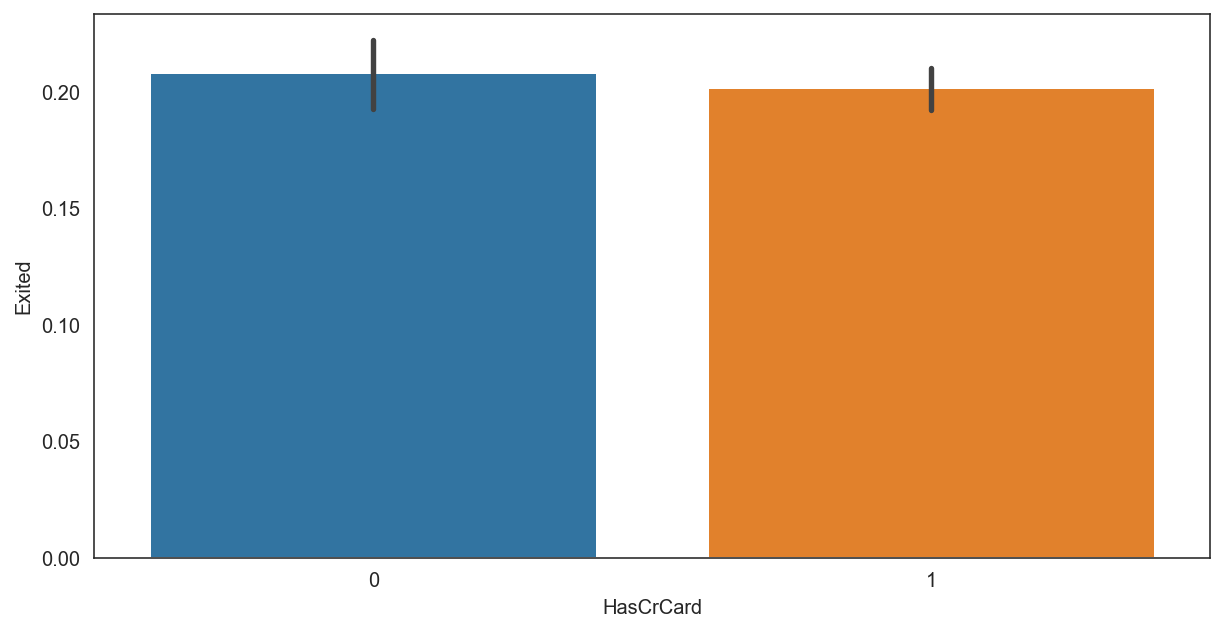

In [57]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x=df['HasCrCard'], y=df['Exited']);

    - In terms of total count, more customers with credit cards churn.
    - However, the churn rate is slighlty higher (~22%) for customers who do not have a credit card with the bank 
      than for customers who have a credit card with the bank (~20%).

### 'IsActiveMember' Feature

In [58]:
member_sum = df['IsActiveMember'].value_counts()
member_sum

1    5151
0    4849
Name: IsActiveMember, dtype: int64

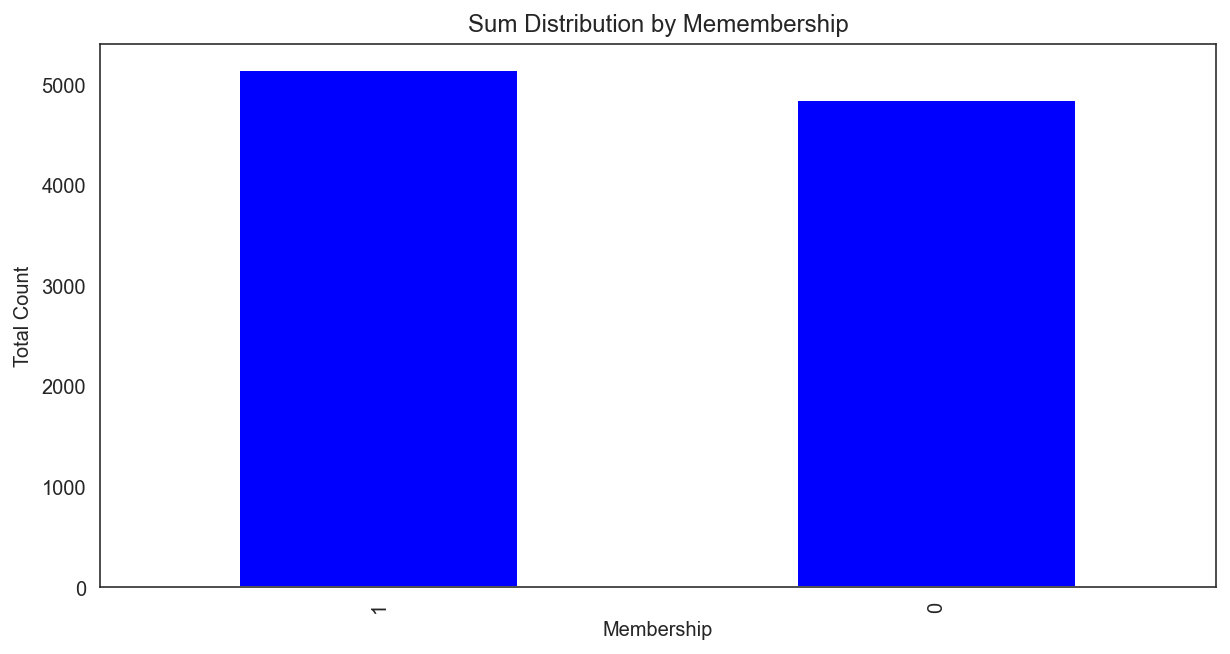

In [59]:
plt.figure(figsize=(10, 5))
member_sum.plot.bar(color='blue')
plt.title('Sum Distribution by Memembership')
plt.xlabel('Membership')
plt.ylabel('Total Count');

In [60]:
member_percent = df['IsActiveMember'].value_counts(normalize=True) * 100
member_percent

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

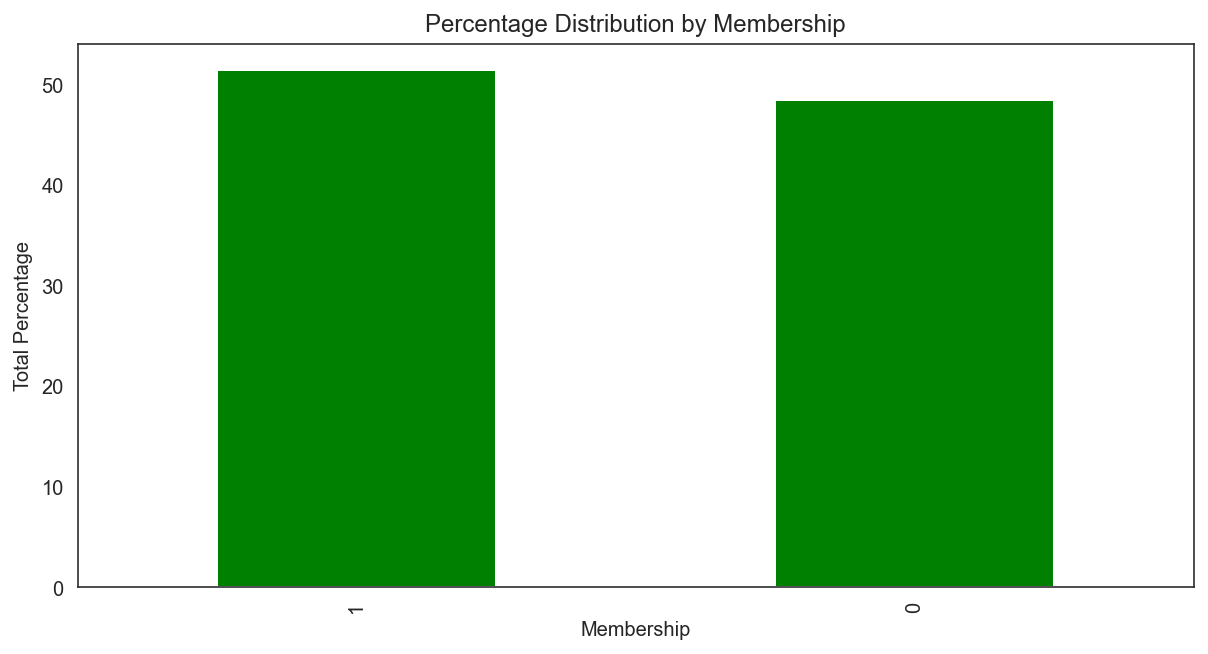

In [61]:
plt.figure(figsize=(10, 5))
member_percent.plot.bar(color='green')
plt.title('Percentage Distribution by Membership')
plt.xlabel('Membership')
plt.ylabel('Total Percentage');

    - Roughly even split between if a customer is an active member (51.51%) or non-member (48.49%).

### vs. Target Variable 

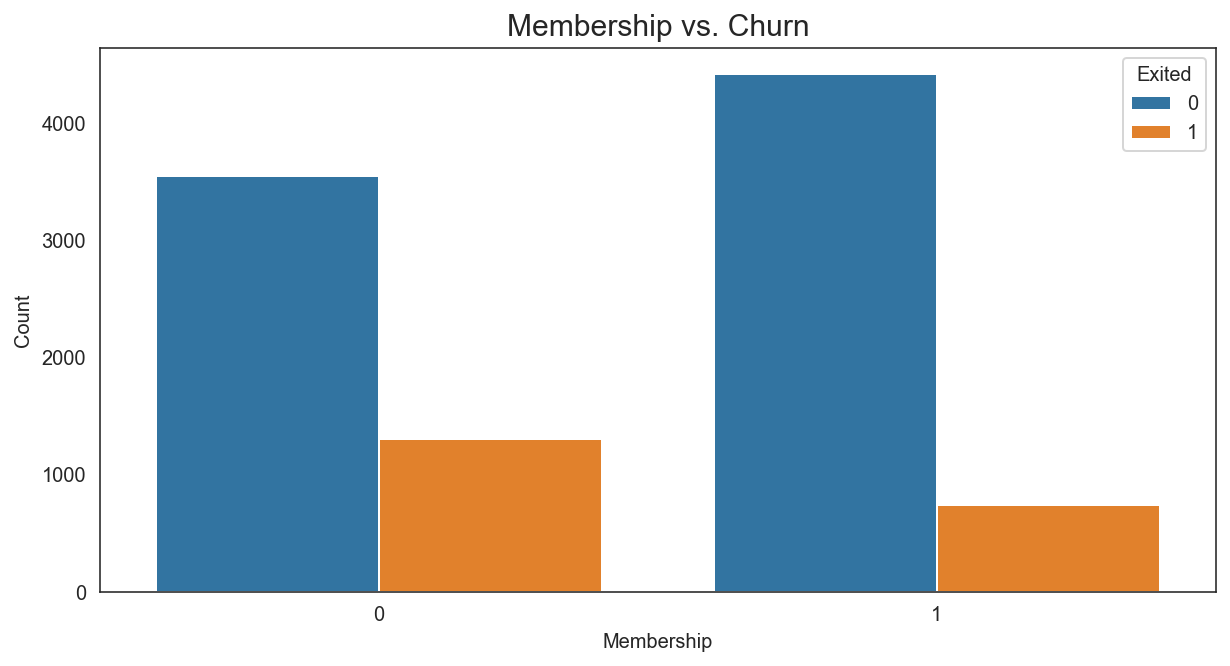

In [62]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x=df['IsActiveMember'], hue=df['Exited'])
plt.title('Membership vs. Churn', size=15)
plt.xlabel('Membership')
plt.ylabel('Count');

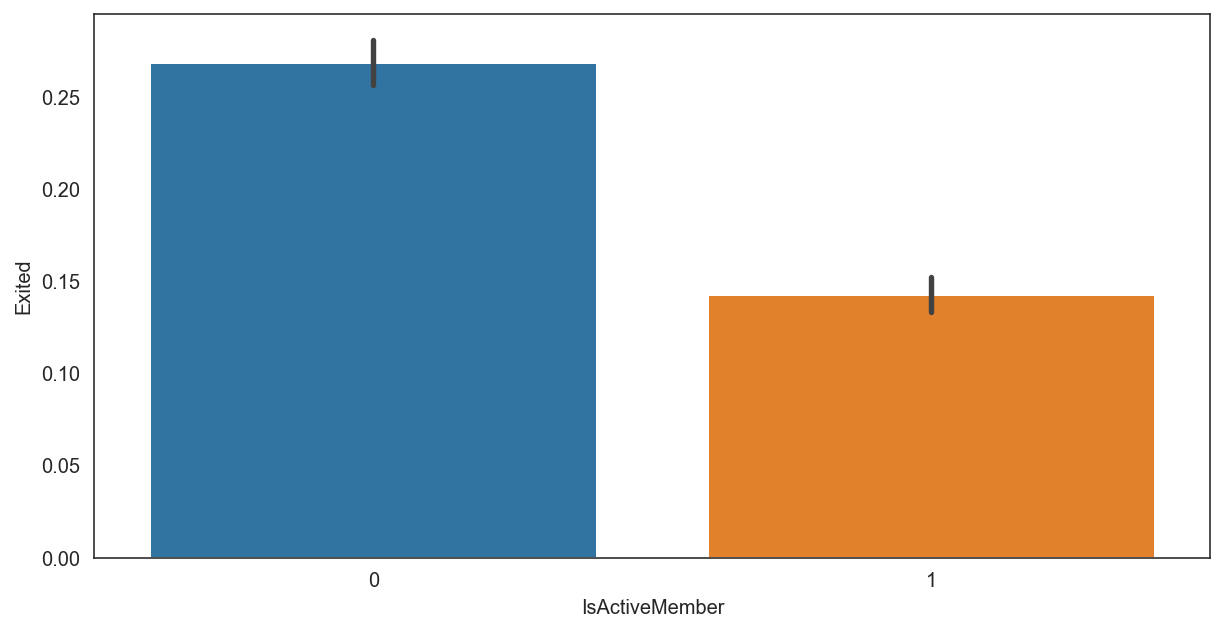

In [63]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x=df['IsActiveMember'], y=df['Exited']);

    - Non-members churn more than active members (~27% vs ~15%).

### Categorical Features Relationship

In [64]:
from sklearn.metrics import mutual_info_score

def cat_mut_inf(series):
    return mutual_info_score(series, df['Exited']) 

cat_mut_info = df[cat_feats].apply(cat_mut_inf) 
cat_mut_info = cat_mut_info.sort_values(ascending=False).to_frame(name='Mutual Info Score') 
cat_mut_info

Mutual Info Score
Geography           0.014017
Gender              0.005652

## 3. Data Preparation

### 3.1 Load the libraries

In [65]:
# Preprocessing 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, OrdinalEncoder

# Model Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

# Metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, precision_score, recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

### 3.2 Check Version History

In [66]:
print('Package Versions:\n')
%watermark -iv

Package Versions:

pandas    : 1.3.3
scipy     : 1.7.1
seaborn   : 0.11.2
matplotlib: 3.4.3
numpy     : 1.21.2
sklearn   : 0.24.2
json      : 2.0.9



### 3.3 Split the dataset into train and test set

Let's look at the dataset

In [67]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [68]:
df.shape

(10000, 11)

In [69]:
train, test = train_test_split(df, test_size=.20, random_state=999)
print('The shape of the train set:', train.shape)
print('The shape of the test set:', test.shape)

The shape of the train set: (8000, 11)
The shape of the test set: (2000, 11)


    - The train set is what we'll use to train the model.
    - The test set is what we'll use to test the best model.

### 3.4 Partition the train set into features (X) and target (y)

In [70]:
X = train.drop('Exited', axis=1)
y = train['Exited']
print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (8000, 10)
The shape of y: (8000,)


Let's look at the features

In [71]:
X.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
8007          647    France    Male   41       4  138937.35              1   
9688          850    France    Male   68       5  169445.40              1   
519           707    France    Male   58       6   89685.92              1   
3830          850    France  Female   29      10       0.00              2   
4057          510    France  Female   26       6  136214.08              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
8007          1               1        101617.64  
9688          1               1        186335.07  
519           0               1        126471.13  
3830          1               1        199775.67  
4057          0               0        159742.33

Let's look at the target

In [72]:
y.head()

8007    1
9688    0
519     0
3830    0
4057    0
Name: Exited, dtype: int64

### 3.5 Split the train set into training and testing sets

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=999)

### 3.6 Divide train set into numerical and categorical features

In [74]:
num_selector = selector(dtype_exclude=object)
num_cols = num_selector(X)

cat_selector = selector(dtype_include=object)
cat_cols = cat_selector(X)

## 4. Modeling 

### 4.1 Metric Selection

    - As we saw during EDA, the target feature 'Exited' in the dataset is imbalanced. 
    - Due to the imbalance, we'll use 'roc-auc' metric to evaluate the model.
    - We'll also take a look at the 'classification_report', 'precision' and 'recall' metrics on the test set.

### 4.2 Model Selection

    We will try the following models:
    - Linear Model (Logistic Regression)
    - Ensemble Model (Random Forest)
    - Boosting Model (History Gradient Boosting)

## Logistic Regression Model

In [75]:
%%time

# Define data preprocessing tools
scl = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

# Define numerical and categorical preprocessing
num_preprocessor = scl
cat_preprocessor = ohe

# Combine numerical and categorical preprocessing 
ct = ColumnTransformer([
    ('numerical', num_preprocessor, num_cols),
    ('categorical', cat_preprocessor, cat_cols)
])

# Define model pipeline
logreg_model = LogisticRegression(solver='liblinear', random_state=999)

logreg = Pipeline([
    ('preprocessing', ct),
    ('model', logreg_model)
])

# Define model evaluation strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

# Evaluate model 
logreg_cvscore = cross_val_score(logreg, X_train, y_train, 
                                 scoring=metric, cv=skfold, n_jobs=-1, error_score='raise', verbose=0) * 100

print(f'The mean CV ROC-AUC score: {logreg_cvscore.mean():.2f}% +/- {logreg_cvscore.std():.2f} std')

The mean CV ROC-AUC score: 75.98% +/- 3.63 std
CPU times: user 73.9 ms, sys: 93.1 ms, total: 167 ms
Wall time: 2.35 s


### Tune Logistic Regression Model

In [76]:
#logreg.get_params()

In [77]:
%%time

# Define parameter grid
logreg_param_grid = {
    'model__C': [0.1, 0.5, 1, 10, 50, 100],
    'model__max_iter': range(50, 500),
    'model__penalty': ['l1', 'l2'],
    'model__tol': [0.00001, 0.0001, 0.000001]
}

logreg_rs = RandomizedSearchCV(logreg, 
                               param_distributions=logreg_param_grid, 
                               n_iter=20, 
                               scoring=metric, 
                               cv=skfold, 
                               n_jobs=-1, 
                               verbose=1)

logreg_rs.fit(X_train, y_train);

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/Users/rainiergoubault/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/rainiergoubault/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/rainiergoubault/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/rainiergoubault/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/rainiergoubault/minic

CPU times: user 711 ms, sys: 63.6 ms, total: 774 ms
Wall time: 52.2 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               StandardScaler(),
                                                                               ['CreditScore',
                                                                                'Age',
                                                                                'Tenure',
                                                                                'Balance',
                                                                                'NumOfProducts',
                                                                                'HasCrCard',
                                                                                'IsActiveMember',
             

### Evaluate Logistic Regression

In [78]:
best_score = logreg_rs.best_score_
print(f'Best LogReg Model mean CV ROC-AUC Score: {(best_score * 100):.2f}%')

Best LogReg Model mean CV ROC-AUC Score: 76.00%


In [79]:
print(f'Best LogReg Model Parameters:\n{logreg_rs.best_params_}')

Best LogReg Model Parameters:
{'model__tol': 0.0001, 'model__penalty': 'l1', 'model__max_iter': 408, 'model__C': 0.1}


In [80]:
print('Best LogReg Model Results:\n')
logreg_results = pd.DataFrame(logreg_rs.cv_results_)
logreg_results.sort_values(by=['rank_test_score'], ascending=True, inplace=True)
logreg_results[['rank_test_score', 'mean_test_score', 'std_test_score', 'params']]

Best LogReg Model Results:



rank_test_score  mean_test_score  std_test_score  \
5                 1         0.760013        0.035922   
13                2         0.759827        0.036242   
16                3         0.759808        0.036169   
15                3         0.759808        0.036169   
4                 3         0.759808        0.036169   
14                6         0.759801        0.036179   
18                7         0.759797        0.036254   
12                7         0.759797        0.036254   
0                 9         0.759796        0.036272   
6                10         0.759794        0.036253   
8                11         0.759794        0.036281   
17               12         0.759793        0.036272   
11               13         0.759790        0.036257   
9                14         0.759790        0.036276   
19               14         0.759790        0.036276   
7                16         0.759788        0.036272   
2                17         0.759787        0.036276   
1                18         0.759784        0.036199   
10               18         0.759784        0.036199   
3                20         0.759783        0.036200   

                                               params  
5   {'model__tol': 0.0001, 'model__penalty': 'l1',...  
13  {'model__tol': 1e-06, 'model__penalty': 'l2', ...  
16  {'model__tol': 1e-06, 'model__penalty': 'l1', ...  
15  {'model__tol': 1e-06, 'model__penalty': 'l1', ...  
4   {'model__tol': 1e-06, 'model__penalty': 'l1', ...  
14  {'model__tol': 0.0001, 'model__penalty': 'l1',...  
18  {'model__tol': 0.0001, 'model__penalty': 'l2',...  
12  {'model__tol': 0.0001, 'model__penalty': 'l2',...  
0   {'model__tol': 1e-05, 'model__penalty': 'l1', ...  
6   {'model__tol': 1e-06, 'model__penalty': 'l2', ...  
8   {'model__tol': 1e-06, 'model__penalty': 'l1', ...  
17  {'model__tol': 0.0001, 'model__penalty': 'l1',...  
11  {'model__tol': 1e-06, 'model__penalty': 'l1', ...  
9   {'model__tol': 1e-05, 'model__penalty': 'l2', ...  
19  {'model__tol': 1e-06, 'model__penalty': 'l2', ...  
7   {'model__tol': 0.0001, 'model__penalty': 'l2',...  
2   {'model__tol': 1e-06, 'model__penalty': 'l2', ...  
1   {'model__tol': 1e-05, 'model__penalty': 'l1', ...  
10  {'model__tol': 1e-05, 'model__penalty': 'l1', ...  
3   {'model__tol': 1e-06, 'model__penalty': 'l1', ...

In [81]:
print('Best LogReg Model is saved!!')
logreg = logreg_rs.best_estimator_

Best LogReg Model is saved!!


## Predictions on the testing set (i.e. hold-out test set)

In [82]:
logreg_pred = logreg.predict(X_test)
logreg_predprob = logreg.predict_proba(X_test)[:,1]

### ROC-AUC

In [83]:
logreg_roc_auc = roc_auc_score(y_test, logreg_predprob)
print(f'Best LogReg ROC-AUC test score: {(logreg_roc_auc * 100):.2f}%')

Best LogReg ROC-AUC test score: 76.92%


### Confusion Matrix

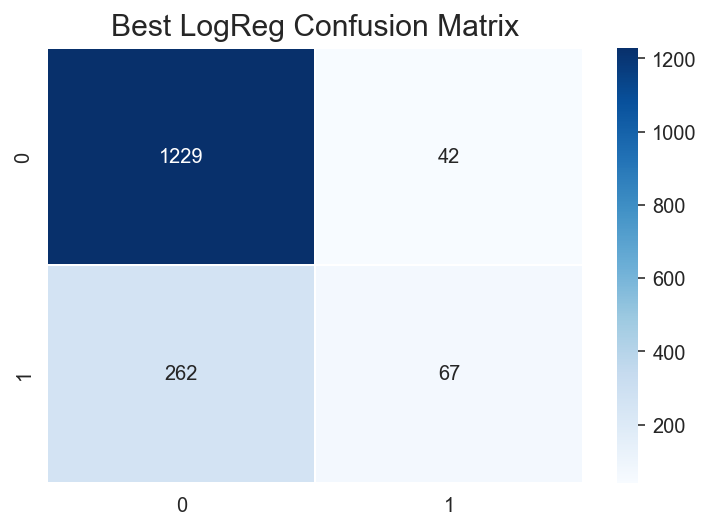

In [84]:
logreg_cm = confusion_matrix(y_test, logreg_pred)
sns.heatmap(logreg_cm, annot=True, fmt='d', linewidths=0.75, cmap='Blues')
plt.title('Best LogReg Confusion Matrix', size=15);

### Classification Report

In [85]:
logreg_cr = classification_report(y_test, logreg_pred)
print(f'Best LogReg Classification Report\n\n{logreg_cr}')

Best LogReg Classification Report

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1271
           1       0.61      0.20      0.31       329

    accuracy                           0.81      1600
   macro avg       0.72      0.59      0.60      1600
weighted avg       0.78      0.81      0.77      1600



### Precision

In [86]:
logreg_precision = precision_score(y_test, logreg_pred) * 100
print(f'Best LogReg model test precision score: {logreg_precision:.2f}%')

Best LogReg model test precision score: 61.47%


### Recall

In [87]:
logreg_recall = recall_score(y_test, logreg_pred) * 100
print(f'Best LogReg model test recall score: {logreg_recall:.2f}%')

Best LogReg model test recall score: 20.36%


### Conclusions:

The LogReg model achieves a mean CV ROC-AUC score of 76.00%, with ROC-AUC score of 76.92%, precision score of 61.47% and recall of 20.36% on the test set.

## Random Forest Model

In [88]:
%%time

# Define data preprocessing tools
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1) 

# Define numerical and categorical preprocessing
cat_preprocessor = oe

# Combine numerical and categorical preprocessing 
ct = ColumnTransformer([
    ('categorical', cat_preprocessor, cat_cols)],
    remainder='passthrough')

# Define model pipeline
rf_model = RandomForestClassifier(random_state=999)

rf = Pipeline([
    ('preprocessing', ct),
    ('model', rf_model)
])

# Define model evaluation strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

# Evaluate model 
rf_cvscore = cross_val_score(rf, X_train, y_train, scoring=metric, 
                             cv=skfold, n_jobs=-1, error_score='raise', verbose=0) * 100

print(f'Random Forest model mean CV ROC-AUC score: {rf_cvscore.mean():.2f}% +/- {rf_cvscore.std():.2f} std')

Random Forest model mean CV ROC-AUC score: 84.96% +/- 1.12 std
CPU times: user 190 ms, sys: 12.7 ms, total: 203 ms
Wall time: 1.94 s


### Tune Random Forest Model

In [89]:
# rf.get_params()

In [90]:
%%time

# Define parameter grid
rf_param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': range(1, 10),
    'model__min_samples_leaf': range(1, 10),
    'model__n_estimators': range(50, 500),
    'model__max_features': range(1, 9)
}

rf_rs = RandomizedSearchCV(rf,
                           param_distributions=rf_param_grid, 
                           n_iter=20,
                           scoring=metric,
                           cv=skfold,
                           n_jobs=-1,
                           verbose=1)

rf_rs.fit(X_train, y_train);

Fitting 10 folds for each of 20 candidates, totalling 200 fits
CPU times: user 3.09 s, sys: 96.6 ms, total: 3.19 s
Wall time: 1min 10s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('categorical',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Geography',
                                                                                'Gender'])])),
                                             ('model',
                                              RandomForestClassifier(random_state=999))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__crit

### Evaluate Random Forest

In [91]:
rf_best_score = rf_rs.best_score_
print(f'Best Random Forest Model Mean CV ROC-AUC Score: {(rf_best_score * 100):.2f}%')

Best Random Forest Model Mean CV ROC-AUC Score: 85.59%


In [92]:
print(f'Best Random Forest Model Parameters:\n{rf_rs.best_params_}')

Best Random Forest Model Parameters:
{'model__n_estimators': 257, 'model__min_samples_leaf': 3, 'model__max_features': 4, 'model__max_depth': 8, 'model__criterion': 'entropy'}


In [93]:
print('Best Random Forest Model Results:\n')
rf_results = pd.DataFrame(rf_rs.cv_results_)
rf_results.sort_values(by=['rank_test_score'], ascending=True, inplace=True)
rf_results[['rank_test_score', 'mean_test_score', 'std_test_score', 'params']]

Best Random Forest Model Results:



rank_test_score  mean_test_score  std_test_score  \
15                1         0.855949        0.015533   
4                 2         0.855369        0.014140   
7                 3         0.854863        0.014287   
10                4         0.854638        0.016234   
14                5         0.853723        0.014329   
12                6         0.853273        0.014368   
13                7         0.852716        0.015201   
6                 8         0.847287        0.016764   
9                 9         0.846632        0.014009   
2                10         0.846417        0.015861   
11               11         0.845723        0.013748   
16               12         0.845464        0.013554   
5                13         0.844928        0.018472   
3                14         0.844529        0.015306   
8                15         0.839017        0.015865   
0                16         0.836547        0.019215   
1                17         0.830646        0.021548   
17               18         0.830449        0.021454   
19               19         0.802703        0.019840   
18               20         0.788743        0.025899   

                                               params  
15  {'model__n_estimators': 257, 'model__min_sampl...  
4   {'model__n_estimators': 473, 'model__min_sampl...  
7   {'model__n_estimators': 339, 'model__min_sampl...  
10  {'model__n_estimators': 193, 'model__min_sampl...  
14  {'model__n_estimators': 121, 'model__min_sampl...  
12  {'model__n_estimators': 171, 'model__min_sampl...  
13  {'model__n_estimators': 207, 'model__min_sampl...  
6   {'model__n_estimators': 407, 'model__min_sampl...  
9   {'model__n_estimators': 423, 'model__min_sampl...  
2   {'model__n_estimators': 315, 'model__min_sampl...  
11  {'model__n_estimators': 422, 'model__min_sampl...  
16  {'model__n_estimators': 96, 'model__min_sample...  
5   {'model__n_estimators': 203, 'model__min_sampl...  
3   {'model__n_estimators': 230, 'model__min_sampl...  
8   {'model__n_estimators': 265, 'model__min_sampl...  
0   {'model__n_estimators': 178, 'model__min_sampl...  
1   {'model__n_estimators': 467, 'model__min_sampl...  
17  {'model__n_estimators': 121, 'model__min_sampl...  
19  {'model__n_estimators': 177, 'model__min_sampl...  
18  {'model__n_estimators': 473, 'model__min_sampl...

In [94]:
print('Best Random Forest Model is saved!!')
rf = rf_rs.best_estimator_

Best Random Forest Model is saved!!


## Prediction on the testing set (i.e. hold-out)

In [95]:
rf_pred = rf.predict(X_test)
rf_predprob = rf.predict_proba(X_test)[:,1]

### ROC-AUC

In [96]:
rf_roc_auc = roc_auc_score(y_test, rf_predprob)
print(f'Best Random Forest model ROC-AUC test score: {(rf_roc_auc * 100):.2f}%')

Best Random Forest model ROC-AUC test score: 86.21%


### Confusion Matrix

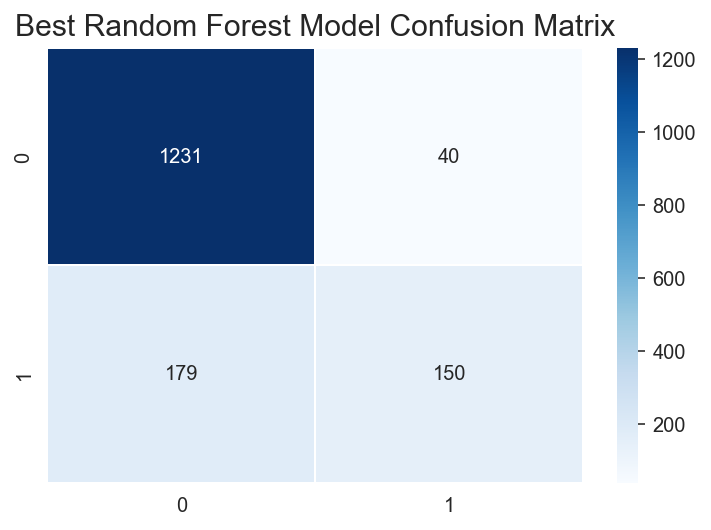

In [97]:
rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', linewidths=0.75, cmap='Blues')
plt.title('Best Random Forest Model Confusion Matrix', size=15);

### Classification Report

In [98]:
rf_cr = classification_report(y_test, rf_pred)
print(f'Best Random Forest Model Classification Report\n\n{rf_cr}')

Best Random Forest Model Classification Report

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1271
           1       0.79      0.46      0.58       329

    accuracy                           0.86      1600
   macro avg       0.83      0.71      0.75      1600
weighted avg       0.86      0.86      0.85      1600



### Precision

In [99]:
rf_precision = precision_score(y_test, rf_pred) * 100
print(f'Best Random Forest Model test precision score: {rf_precision:.2f}%')

Best Random Forest Model test precision score: 78.95%


### Recall

In [100]:
rf_recall = recall_score(y_test, rf_pred) * 100
print(f'Best Random Forest Model test recall score: {rf_recall:.2f}%')

Best Random Forest Model test recall score: 45.59%


### Conclusions:

The Random Forest model achieved a mean CV ROC-AUC score of 85.59%, with ROC-AUC score of 86.20%, precision score of 78.95% and recall of 45.59% on the test set. So far it appears that the Random Forest model is outperforming the Logistic Regression model on all metrics.

## History Gradient Boosting Model

In [101]:
%%time

# Define data preprocessing tools
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1) 

# Define numerical and categorical preprocessing
cat_preprocessor = oe

# Combine numerical and categorical preprocessing 
ct = ColumnTransformer([
    ('categorical', cat_preprocessor, cat_cols)],
    remainder='passthrough')

# Define model pipeline
hgb = Pipeline([
    ('preprocessing', ct),
    ('model', HistGradientBoostingClassifier(random_state=999))
])

# Define model evaluation strategy
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

# Evaluate model 
hgb_cvscore = cross_val_score(hgb, X_train, y_train, 
                              scoring=metric, cv=skfold, n_jobs=-1, error_score='raise', verbose=0) * 100

print(f'History Gradient Boosting model mean CV ROC-AUC score: {hgb_cvscore.mean():.2f}% +/- {hgb_cvscore.std():.2f} std')

History Gradient Boosting model mean CV ROC-AUC score: 85.40% +/- 1.50 std
CPU times: user 118 ms, sys: 9.64 ms, total: 128 ms
Wall time: 1.11 s


### Tune History Gradient Boosting Model

In [102]:
# hgb.get_params()

In [103]:
%%time

# Define parameter grid
hgb_param_grid = {
    'model__max_iter': range (500, 1000),
    'model__max_depth': range(1, 10),
    'model__learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
}

hgb_rs = RandomizedSearchCV(hgb,
                            param_distributions=hgb_param_grid, 
                            n_iter=20,
                            scoring=metric,
                            cv=skfold,
                            n_jobs=-1,
                            verbose=1)

hgb_rs.fit(X_train, y_train);

Fitting 10 folds for each of 20 candidates, totalling 200 fits
CPU times: user 37.8 s, sys: 1.48 s, total: 39.3 s
Wall time: 1min 27s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('categorical',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Geography',
                                                                                'Gender'])])),
                                             ('model',
                                              HistGradientBoostingClassifier(random_state=999))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'mod

### Evaluate History Gradient Boosting

In [104]:
hgb_best_score = hgb_rs.best_score_
print(f'Best History Gradient Boosting Model Mean CV ROC-AUC Score: {(hgb_best_score * 100):.2f}%')

Best History Gradient Boosting Model Mean CV ROC-AUC Score: 85.61%


In [105]:
print(f'Best History Gradient Boosting Model Parameters:\n{hgb_rs.best_params_}')

Best History Gradient Boosting Model Parameters:
{'model__max_iter': 758, 'model__max_depth': 8, 'model__learning_rate': 0.01}


In [106]:
print('Best History Gradient Model Results:\n')
hgb_results = pd.DataFrame(hgb_rs.cv_results_)
hgb_results.sort_values(by=['rank_test_score'], ascending=True, inplace=True)
hgb_results[['rank_test_score', 'mean_test_score', 'std_test_score', 'params']]

Best History Gradient Model Results:



rank_test_score  mean_test_score  std_test_score  \
16                1         0.856119        0.015331   
19                2         0.853151        0.014034   
11                3         0.847907        0.017082   
9                 4         0.846429        0.016778   
7                 5         0.845618        0.016542   
1                 6         0.844891        0.016501   
18                7         0.836188        0.014658   
17                8         0.830431        0.015388   
13                9         0.830418        0.014695   
4                10         0.830023        0.015515   
0                11         0.829015        0.018949   
10               12         0.828429        0.014134   
5                13         0.828375        0.014460   
14               14         0.827259        0.016817   
3                15         0.824892        0.017025   
12               16         0.824570        0.017697   
2                17         0.821125        0.018391   
6                18         0.820647        0.013836   
15               19         0.816357        0.012762   
8                20         0.816300        0.012805   

                                               params  
16  {'model__max_iter': 758, 'model__max_depth': 8...  
19  {'model__max_iter': 525, 'model__max_depth': 2...  
11  {'model__max_iter': 641, 'model__max_depth': 1...  
9   {'model__max_iter': 825, 'model__max_depth': 6...  
7   {'model__max_iter': 657, 'model__max_depth': 1...  
1   {'model__max_iter': 885, 'model__max_depth': 1...  
18  {'model__max_iter': 921, 'model__max_depth': 3...  
17  {'model__max_iter': 548, 'model__max_depth': 6...  
13  {'model__max_iter': 517, 'model__max_depth': 7...  
4   {'model__max_iter': 562, 'model__max_depth': 7...  
0   {'model__max_iter': 518, 'model__max_depth': 1...  
10  {'model__max_iter': 719, 'model__max_depth': 3...  
5   {'model__max_iter': 783, 'model__max_depth': 7...  
14  {'model__max_iter': 664, 'model__max_depth': 5...  
3   {'model__max_iter': 581, 'model__max_depth': 5...  
12  {'model__max_iter': 972, 'model__max_depth': 3...  
2   {'model__max_iter': 597, 'model__max_depth': 6...  
6   {'model__max_iter': 984, 'model__max_depth': 8...  
15  {'model__max_iter': 974, 'model__max_depth': 6...  
8   {'model__max_iter': 842, 'model__max_depth': 6...

In [107]:
print('Best History Gradient Boosting Model is saved!!')
hgb = hgb_rs.best_estimator_

Best History Gradient Boosting Model is saved!!


## Prediction on the testing set (i.e. hold-out)

In [108]:
hgb_pred = hgb.predict(X_test)
hgb_predprob = hgb.predict_proba(X_test)[:,1]

### ROC-AUC

In [109]:
hgb_roc_auc = roc_auc_score(y_test, hgb_predprob)
print(f'Best History Gradient Boosting model ROC-AUC test score: {(hgb_roc_auc * 100):.2f}%')

Best History Gradient Boosting model ROC-AUC test score: 86.36%


### Confusion Matrix

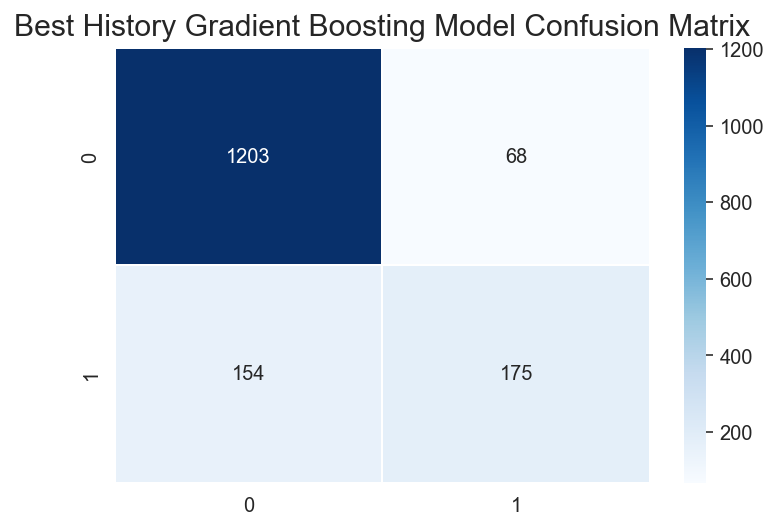

In [110]:
hgb_cm = confusion_matrix(y_test, hgb_pred)
sns.heatmap(hgb_cm, annot=True, fmt='d', linewidths=0.75, cmap='Blues')
plt.title('Best History Gradient Boosting Model Confusion Matrix', size=15);

### Classification Report

In [111]:
hgb_cr = classification_report(y_test, hgb_pred)
print(f'Best History Gradient Boosting Model Classification Report\n\n{hgb_cr}')

Best History Gradient Boosting Model Classification Report

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1271
           1       0.72      0.53      0.61       329

    accuracy                           0.86      1600
   macro avg       0.80      0.74      0.76      1600
weighted avg       0.85      0.86      0.85      1600



### Precision

In [112]:
hgb_precision = precision_score(y_test, hgb_pred) * 100
print(f'Best History Gradient Boosting Model test precision score: {hgb_precision:.2f}%')

Best History Gradient Boosting Model test precision score: 72.02%


### Recall

In [113]:
hgb_recall = recall_score(y_test, hgb_pred) * 100
print(f'Best History Gradient Boosting Model test recall score: {hgb_recall:.2f}%')

Best History Gradient Boosting Model test recall score: 53.19%


### Conclusions:

The History Gradient Boosting model achieved a mean CV ROC-AUC score of 85.61%, with ROC-AUC score of 86.36%, precision score of 72.02% and recall of 53.19% on the test set. It appears that the Random Forest model is slightly outperforming the History Gradient Boosting model.

## Model Comparison

Let's compare all three model performance

In [114]:
# Define model comparison evaluation strategy
cv_method_ttest = StratifiedKFold(n_splits=10, shuffle=True, random_state=111)

### Best Logistic Regression

In [115]:
%%time
logreg_cv_results = cross_val_score(logreg, X_train, y_train, 
                                    scoring=metric, cv=cv_method_ttest, n_jobs=-1, error_score='raise', verbose=0) * 100
                              
print(f'Best Logistic Regression Model mean CV ROC-AUC score: {logreg_cv_results.mean():.2f}%')

Best Logistic Regression Model mean CV ROC-AUC score: 76.08%
CPU times: user 87.4 ms, sys: 9.23 ms, total: 96.6 ms
Wall time: 202 ms


In [116]:
logreg_results = pd.DataFrame(logreg_cv_results, columns=['LogReg'])

### Best Random Forest

In [117]:
%%time
rf_cv_results = cross_val_score(rf, X_train, y_train, 
                                scoring=metric, cv=cv_method_ttest, n_jobs=-1, error_score='raise', verbose=0) * 100
                              
print(f'Best Random Forest Model mean CV ROC-AUC score: {rf_cv_results.mean():.2f}%')

Best Random Forest Model mean CV ROC-AUC score: 85.56%
CPU times: user 38.8 ms, sys: 5.85 ms, total: 44.6 ms
Wall time: 5.86 s


In [118]:
rf_results = pd.DataFrame(rf_cv_results, columns=['RF'])

### Best History Gradient Boosting 

In [119]:
%%time
hgb_cv_results = cross_val_score(hgb, X_train, y_train, 
                                scoring=metric, cv=cv_method_ttest, n_jobs=-1, error_score='raise', verbose=0) * 100
                              
print(f'Best History Gradient Boosting Model mean CV ROC-AUC score: {hgb_cv_results.mean():.2f}%')

Best History Gradient Boosting Model mean CV ROC-AUC score: 85.59%
CPU times: user 43.7 ms, sys: 7.52 ms, total: 51.3 ms
Wall time: 8.81 s


In [120]:
hgb_results = pd.DataFrame(hgb_cv_results, columns=['HGB'])

In [121]:
print(stats.ttest_rel(logreg_cv_results, rf_cv_results))
print(stats.ttest_rel(logreg_cv_results, hgb_cv_results))
print(stats.ttest_rel(rf_cv_results, hgb_cv_results))

Ttest_relResult(statistic=-14.43163992893042, pvalue=1.5770506304483918e-07)
Ttest_relResult(statistic=-13.266998838877122, pvalue=3.260519345832589e-07)
Ttest_relResult(statistic=-0.13330444193851207, pvalue=0.8968856803271911)


A p-value smaller than 0.05 indicates a statistically significant difference. 
    
Looking at these results, we observe that the difference compared between LogReg model and both RF and HGB are indeed statistically significant (both p-values are smaller than 0.05), thus we can conclude that at a 95% significance level, both RF and HGB are statistically better models (in terms of ROC-AUC) when compared on the test set. However, the difference compared between RF and HGB model is not smaller than 0.05, thus the difference is not statistically significant. The RF and HGB models perfomed similiarly.

### Model Comparison Summary

Let's examine all the model scores

In [122]:
all_model_results = pd.concat([logreg_results, rf_results, hgb_results], axis=1)
all_model_results.T

0          1          2          3          4          5  \
LogReg  77.805606  73.258447  77.507161  74.882647  75.746487  80.389525   
RF      89.390963  85.113754  88.758080  85.788629  82.822178  87.456753   
HGB     89.279983  84.591851  88.806071  86.205552  82.057319  86.992961   

                6          7          8          9  
LogReg  74.654021  73.207468  77.860296  75.453352  
RF      85.155691  83.127535  86.050465  81.916607  
HGB     84.635230  84.809711  86.444166  82.056788

In [123]:
all_model_results.describe().T

count       mean       std        min        25%        50%  \
LogReg   10.0  76.076501  2.283745  73.207468  74.711177  75.599920   
RF       10.0  85.558065  2.490960  81.916607  83.624090  85.472160   
HGB      10.0  85.587963  2.461165  82.056788  84.602695  85.507632   

              75%        max  
LogReg  77.730995  80.389525  
RF      87.105181  89.390963  
HGB     86.855762  89.279983

In [124]:
all_model_results.mean()

LogReg    76.076501
RF        85.558065
HGB       85.587963
dtype: float64

## Conclusions

From the above results, our aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more important than the overall ROC-AUC score of the model.

From EDA, we saw that we had about 20% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.

From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the History Gradient Boosting model where according to the fit on the training set, with a precision score on 1's of 0.72, out of all customers that the model thinks will churn, 72.02% do actually churn and with the recall score of 0.53 on the 1's, the model is able to highlight 53.19% of all those who churned.

## Save Our Best Model

In [125]:
# Fit best model on all the data
hgb.fit(X, y);

In [126]:
import joblib
joblib.dump(hgb, 'customer_churn_model_v1.pkl', compress=1)
print('Best Model Saved!!')

Best Model Saved!!


## Deploy Model On New Unseen Data (aka test set)

### Load Best Model

In [127]:
best_model = joblib.load('customer_churn_model_v1.pkl')
best_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Geography', 'Gender'])])),
                ('model',
                 HistGradientBoostingClassifier(learning_rate=0.01, max_depth=8,
                                                max_iter=758,
                                                random_state=999))])

Let's look at the test set

In [128]:
test.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9031          541    France    Male   39       7       0.00              2   
3462          428    France  Female   62       1  107735.93              1   
3863          674    France  Female   28       3       0.00              1   
1144          765   Germany    Male   43       4  148962.76              1   
2692          751    France    Male   31       8       0.00              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
9031          1               0         19823.02       0  
3462          0               1         58381.77       0  
3863          1               0         51536.99       0  
1144          0               1        173878.87       1  
2692          0               0         17550.49       0

In [129]:
test.shape

(2000, 11)

### Split test set into features (X) and target (y)

In [130]:
X_new = test.drop('Exited', axis=1)
y_new = test['Exited']

### Make Predictions with Best Model

In [131]:
y_pred = best_model.predict(X_new)

In [132]:
final_predictions = pd.DataFrame({'Model Predictions': y_pred, 'Actual Results': y_new})
final_predictions.head(15)

Model Predictions  Actual Results
9031                  0               0
3462                  0               0
3863                  0               0
1144                  0               1
2692                  0               0
9541                  0               0
2227                  0               0
210                   0               0
5709                  0               0
9334                  0               0
3928                  0               0
665                   0               0
6592                  0               0
275                   0               0
3768                  0               0

### Evaluate Predictions

In [133]:
comparison = y_pred == y_new
np.unique(comparison, return_counts=True)

(array([False,  True]), array([ 263, 1737]))

    - The best model made 1737 correct predictions, while 263 predictions were incorrect.

### Confusion Matrix

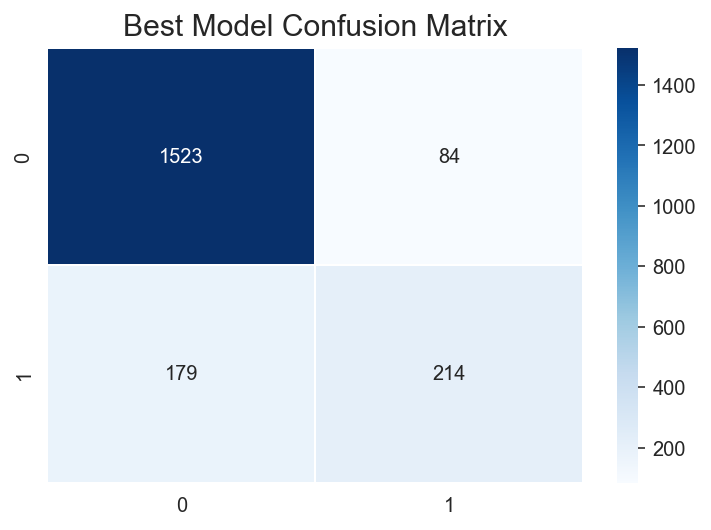

In [134]:
cm = confusion_matrix(y_new, y_pred)
sns.heatmap(cm, annot=True, fmt='d', linewidths=0.75, cmap='Blues')
plt.title('Best Model Confusion Matrix', size=15);

### Classification Report

In [135]:
cr = classification_report(y_new, y_pred)
print(f'Best Model Classification Report\n\n{cr}')

Best Model Classification Report

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.72      0.54      0.62       393

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



### Precision

In [136]:
precision = precision_score(y_new, y_pred) * 100
print(f'Best Model test precision score: {precision:.2f}%')

Best Model test precision score: 71.81%


### Recall

In [137]:
recall = recall_score(y_new, y_pred) * 100
print(f'Best Model test recall score: {recall:.2f}%')

Best Model test recall score: 54.45%


### Save Predictions to CSV

In [138]:
final_predictions.to_csv('customer_churn_bank_predictions_v1.csv')
print('Final Predictions CSV file saved!!')

Final Predictions CSV file saved!!


## Reproducibility

In [139]:
%watermark -a 'Rainier Goubault' -u -d -n -m -v -iv 

Author: Rainier Goubault

Last updated: 2021-11-16

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.27.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

pandas    : 1.3.3
scipy     : 1.7.1
seaborn   : 0.11.2
matplotlib: 3.4.3
numpy     : 1.21.2
sklearn   : 0.24.2
json      : 2.0.9
joblib    : 1.0.1

